# **Introduction**

# **Tourpackage Prediction**
Predicting the Tour Package Using a Machine Learning Model

## **Problem Statement**

Tourism forecasting is critical for the industry's contribution to the region's economic development, and **"Visit with us Company"** is no exception, as it will allow them to achieve their goals and potential stability as a company. 

The company wishes to enable and establish a viable business model in order to expand its customer base. One way to broaden the customer base is to introduce a new package offering, as the company currently offers five packages: Basic, Standard, Deluxe, Super Deluxe, and King.According to last year's data, 18% of customers purchased the packages. The marketing cost, on the other hand, was quite high because customers were contacted at random without regard for the available information. The company is now planning to introduce a new product called the Wellness Tourism Package. Wellness tourism is defined as travel that allows the traveler to maintain, improve, or begin a healthy lifestyle, as well as support or increase one's sense of well-being. This time, however, the company wants to use the available data of existing and potential customers to make marketing expenditure more efficient.

As Group 9 Data Scientists, our job is to analyze customer data and information in order to make recommendations to policymakers and marketing teams, as well as to build a model to predict who will buy the newly introduced travel package.

## **Objective**

* Identifying and targeting the customer segment most likely to purchase the newly launched travel package



## **Contributors:**
This is a submission for group 9 members including:
+ Lydia Tuwei ,
+ Obasohan Lucy,
+ Oluwabusola Talabi,
+ Love Chukwuegbo,
+ Ngozi Ihemadu,
+ Maria Koko,
+ Manuella Kolela.
 



## **Data Description**

The data for this project was scraped from the Kaggle website [https://www.kaggle.com] and the description of this data is provided as below:

`CustomerID`: Unique customer ID

`ProdTaken`: Whether the customer has purchased a package or not (0: No, 1: Yes)

`Age`: Age of customer

`TypeofContact`: How customer was contacted (Company Invited or Self Inquiry)

`CityTier`: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3

`Occupation`: Occupation of customer

`Gender`: Gender of customer

`NumberOfPersonVisiting`: Total number of persons planning to take the trip with the customer

`PreferredPropertyStar`: Preferred hotel property rating by customer

`MaritalStatus`: Marital status of customer

`NumberOfTrips`: Average number of trips in a year by customer

`Passport`: The customer has a passport or not (0: No, 1: Yes)

`OwnCar`: Whether the customers own a car or not (0: No, 1: Yes)

`NumberOfChildrenVisiting`: Total number of children with age less than 5 planning to take the trip with the customer

`Designation`: Designation of the customer in the current organization

`MonthlyIncome`: Gross monthly income of the customer

### **Customer interaction data:**

`PitchSatisfactionScore`: Sales pitch satisfaction score

`ProductPitched`: Product pitched by the salesperson

`NumberOfFollowups`: Total number of follow-ups has been done by the salesperson after the sales pitch

`DurationOfPitch`: Duration of the pitch by a salesperson to the customer

### **Importing Libraries**

In [ ]:
## Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.pyplot import Figure
from matplotlib.colors import ListedColormap 
%matplotlib inline

# Libraries to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

                                                                

In [ ]:
#mounting drive
from  google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## **Data Wrangling**

**Read and understand the Dataset**

In [ ]:
#loading the data and inspecting a few lines 
tourdata=pd.read_csv('/content/drive/MyDrive/tour_data.csv')
tourdata.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
tourdata.tail()#inspecting the las five rows of the dataset

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
tourdata.sample(10) #inspecting random data row samples to gain a better understanding of features and observations

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1717,201717,0,34.0,Self Enquiry,1,8.0,Salaried,Male,2,4.0,Deluxe,5.0,Married,7.0,0,4,0,1.0,Manager,20957.0
669,200669,1,39.0,Self Enquiry,1,12.0,Small Business,Male,3,3.0,Basic,5.0,Divorced,1.0,1,2,1,1.0,Executive,17404.0
2584,202584,1,33.0,Self Enquiry,1,16.0,Small Business,Female,3,4.0,Basic,5.0,Unmarried,2.0,0,4,1,2.0,Executive,22878.0
4103,204103,0,52.0,Self Enquiry,1,10.0,Small Business,Female,4,4.0,Super Deluxe,4.0,Single,5.0,0,5,1,2.0,AVP,32412.0
195,200195,0,NaN,Self Enquiry,1,27.0,Salaried,Male,3,2.0,Basic,5.0,Divorced,2.0,1,3,0,2.0,Executive,18564.0
1608,201608,0,25.0,Self Enquiry,3,34.0,Salaried,Male,2,4.0,Deluxe,3.0,Married,3.0,0,4,1,1.0,Manager,23639.0
2199,202199,0,35.0,Self Enquiry,1,31.0,Small Business,Female,2,3.0,Standard,3.0,Married,2.0,1,3,0,1.0,Senior Manager,25388.0
4441,204441,0,33.0,Self Enquiry,3,17.0,Small Business,Male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,4,1,2.0,Manager,24074.0
2134,202134,0,36.0,Self Enquiry,1,20.0,Salaried,Male,3,3.0,Deluxe,3.0,Married,1.0,1,5,1,0.0,Manager,21586.0
4519,204519,0,39.0,Company Invited,1,19.0,Salaried,Male,2,5.0,Deluxe,5.0,Married,4.0,0,5,1,1.0,Manager,24966.0


In [ ]:
tourdata.shape #checking the shape of the data

(4888, 20)

*There are 4888 observatons and 20 features in this dataset*

In [ ]:
# getting the names of columns 
tourdata.columns.tolist()
list(tourdata.columns)

['CustomerID',
 'ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome']

In [ ]:
tourdata.info()  #Checking the basic info of the data to better understand

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

There are some fields with null values; Before we begin cleaning, we will confirm the null values for each field in the next line.

In [ ]:
#checking the null values in the dataset
tourdata.isnull().sum().sort_values(ascending = True)

CustomerID                    0
ProdTaken                     0
OwnCar                        0
CityTier                      0
PitchSatisfactionScore        0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
Designation                   0
ProductPitched                0
MaritalStatus                 0
Passport                      0
TypeofContact                25
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64

The fields `Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting` and `MonthlyIncome` got null values.

In [ ]:
# displaying the null values for each column by count and percentage in ascending order on a table
tourdata_null_summary = pd.concat([tourdata.isnull().sum(), tourdata.isnull().sum() * 100 /tourdata.isnull().count()], axis = 1)
tourdata_null_summary.columns = ['Nan values', 'Percent Nan values']
tourdata_null_summary.sort_values(by='Percent Nan values', ascending=True).style.background_gradient(cmap ='viridis')

,Nan values,Percent Nan values
CustomerID,0,0.000000
ProdTaken,0,0.000000
OwnCar,0,0.000000
CityTier,0,0.000000
PitchSatisfactionScore,0,0.000000
Occupation,0,0.000000
Gender,0,0.000000
NumberOfPersonVisiting,0,0.000000
Designation,0,0.000000
ProductPitched,0,0.000000


`Age,Monthly income` and `Durationofpitch` have the most significant missing values while `typeofcontract`, `preferreedproperty`,`NumberOfFollowups` have the least

The null values in field `NumberOfChildrenVisiting` may mean no child visited 

In [ ]:
#Checking the basic summary statistics of the dataset with numeric datatypes
tourdata.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0




1.   The average `age` of customers is 37, with the lowest being 18 and the highest being 61.
2.   18% of the customers purchased the product
3.   A customer makes 3 trips on average with maximum being 22
4.   The average number of adults who visit is three, with the largest group consisting of five people, whereas the number of children who visit ranges from one to three.
5.   The highest number of times a salesperson followed up with a customer was 6
6.   Customers' `monthlyincome` ranged from 1000 to 98678 dollars, with the majority earning an average of 23619.
7.   The majority of customers preferred a three-star hotel, with a few opting for a five-star hotel.
 





In [ ]:
#checking the summary statistics of the fields with string/Object datatype
tourdata.describe(include='object').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842




1.   The most common `typeofcontact` made by customers is `Self Enquiry`
2.   Most customers are `Salaried` in terms of `Occupation`
3.   `Male` customers are the majority
4.   The most common purchased package by customers is `Basic`.
5.   Most Customers fall under the `Executive`
6.   The `MaritalStatus` of most customers is `Married`

These subset of data are Categorical variables since they are presented in string format while the others are numerical value with ProdTaken being Target variable.


In [ ]:
#Checking the distribution of categorical features and Target Variable by count.
#we will use function to avoid repitition of lines of codes.
cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
for i in cols:
    print('The values in',i, 'column are :')
    print(tourdata[i].value_counts())
    print('*'*50) 


The values in Designation column are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************
The values in ProdTaken column are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
The values in OwnCar column are :
1    3032
0    1856
Name: OwnCar, dtype: int64
**************************************************
The values in Passport column are :
0    3466
1    1422
Name: Passport, dtype: int64
**************************************************
The values in CityTier column are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
The values in MaritalStatus column are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
The values in


*  `Single` and `unmarried` status are not the same thing; `unmarried` may refer to partners who are dating or engaged.
*   `Female` and `Fe male` category in the dataset means the same thing thus this need to be fixed.
*  Majority of the customers come from Tier1 cities.
*   Most people came with their cars and majority didnt come with a `passport`which may indicate less visit by foreigners.
*  The `basic package` is the most pitched followed closely by the `deluxe package`
*   `Salaried customers` followed by small business owners make up most of the customer base












## **Data Exploration and Cleaning**

#### **Fixing Data Types**

Despite the fact that the majority of machine learning algorithms only work with numeric values, many crucial real-world features are categorical rather than numeric.This particular dataset that we are working with is no different. By binning underlying numerical features so that people are recognized by ranges, categories like `age` and `monthlyincome` can be created.

In [ ]:
#convert data type of category variables from object/float to category
#store the columns in a variable category columns to avoid repitition

category_columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched' \
                   , 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']

                   

#convert using astype
tourdata[category_columns] = tourdata[category_columns].astype('category')


#confirming the changes
tourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

#### **Fixing column names**

The best data analysis practice necessitates removing spaces from column names by replacing space with an underscore`(_)` and making all column names lower case.


In [ ]:
list(tourdata.columns)

['CustomerID',
 'ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome']

In [ ]:
#code that replaces spaces and coverts headers to lowercase
tourdata.columns = [x.replace(" ", "_").lower() for x in tourdata.columns]

In [ ]:
#confirming the changes
tourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customerid                4888 non-null   int64   
 1   prodtaken                 4888 non-null   category
 2   age                       4662 non-null   float64 
 3   typeofcontact             4863 non-null   category
 4   citytier                  4888 non-null   category
 5   durationofpitch           4637 non-null   float64 
 6   occupation                4888 non-null   category
 7   gender                    4888 non-null   category
 8   numberofpersonvisiting    4888 non-null   int64   
 9   numberoffollowups         4843 non-null   float64 
 10  productpitched            4888 non-null   category
 11  preferredpropertystar     4862 non-null   float64 
 12  maritalstatus             4888 non-null   category
 13  numberoftrips             4748 non-null   float6

#### **Fixing** `gender` **value** 

In [ ]:
#Fe male value is separated by a space, which must be removed.
tourdata['gender'] = tourdata['gender'].str.replace(' ', '').str.capitalize()


In [ ]:
#define function that loops through all values in gender column to replace the wrong data in gender column i.e "Fe Male" to "Female"
for x in tourdata.index:
  if tourdata.loc[x, "gender"] =='Fe Male':
    tourdata.loc[x, "gender"] ='Female'

In [ ]:
#check to see if any changes have been made
tourdata.gender.value_counts()

Male      2916
Female    1972
Name: gender, dtype: int64

#### **Dropping unwanted columns**

In [ ]:
#The Customerid column will be removed because it is not relevant to the analysis.
tourdata.drop(columns=['customerid'], inplace=True)

## **Exploratory Data Analysis and cleaning**

## **Study of relationships between Variables**

##### **Univariate Analysis**

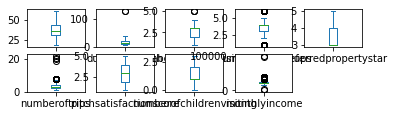

In [ ]:
#checking the outliers in a dataset using boxplot
tourdata.plot(kind = 'box', subplots = True,layout = (5,5) , sharex = False, sharey = False)
plt.rcParams['figure.figsize'] = (20, 30)  #checking for outliers in each feature in the data

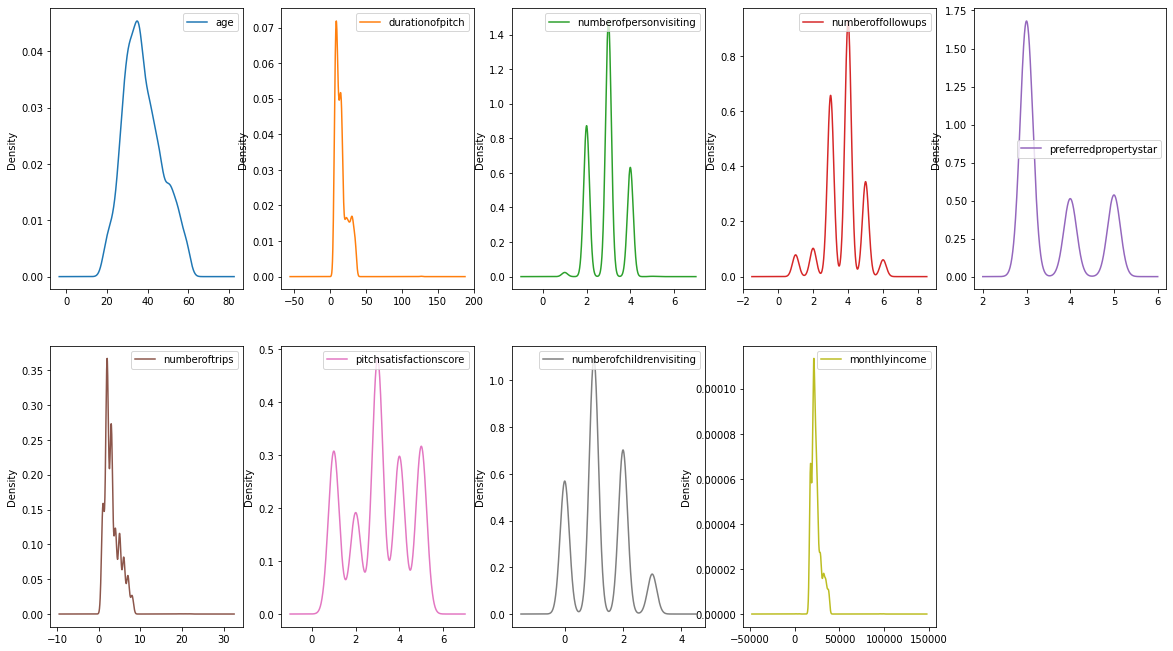

In [ ]:
tourdata.plot(kind = 'density', subplots = True,layout = (5,5) ,sharex = False, sharey = False)
plt.rcParams['figure.figsize'] = (20, 30)   #checking for normalization of each feature in the  data

In [ ]:
def feature_check(x):
 
    x_min = tourdata[x].min()
    x_max = tourdata[x].max()
    Q1 = tourdata[x].quantile(0.25)
    Q2 = tourdata[x].quantile(0.50)
    Q3 = tourdata[x].quantile(0.75)
    
    dict={'Min': x_min, 'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'Max': x_max}
    df = pd.DataFrame(data=dict, index=['Value'])
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n')
    #print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('Pastel1')
    
    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(tourdata[x], color = 'purple')
    ax1.axvline(
        np.mean(tourdata[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(tourdata[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x = tourdata[x], palette = 'viridis', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(x=tourdata[x], palette = 'magma', width=0.7, linewidth=0.6, showmeans=True)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(tourdata[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()



5 Point Summary of Age Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


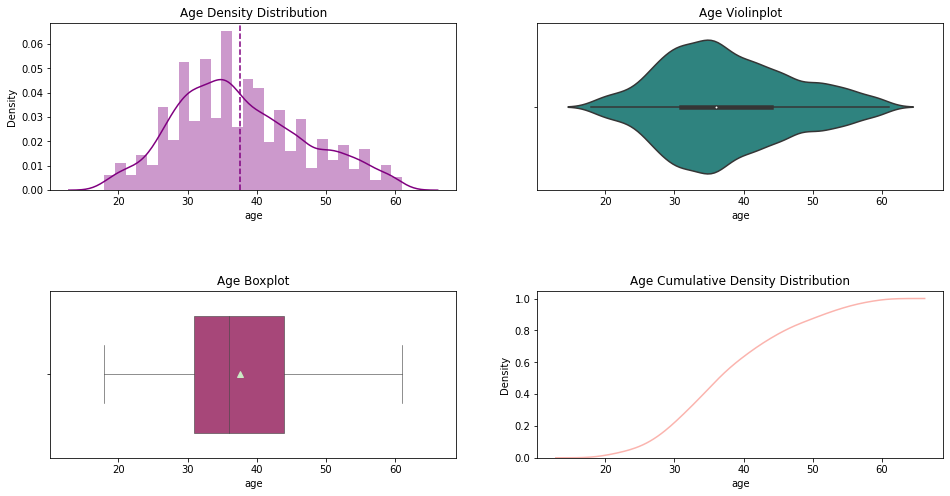

In [ ]:
feature_check('age')

In [ ]:
tourdata['age'] = tourdata['age'].fillna(tourdata['age'].mean())  # replacing the missing values in age column with mean age

FINDING: age is somewhat normally distributed with no outliers

5 Point Summary of Durationofpitch Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


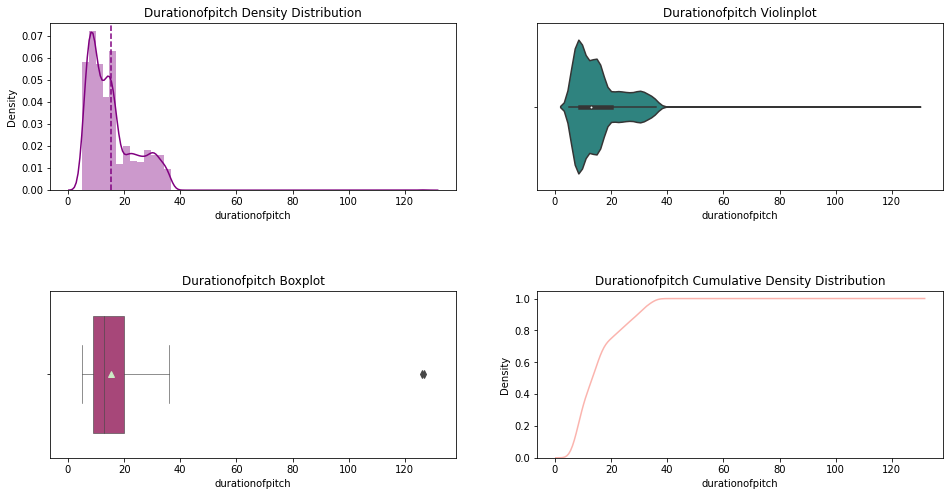

In [ ]:
feature_check('durationofpitch')   #Checking the duration of pitch column

FINDING: pitch duration is skewed to the right with outliers. the hghest pitch is almost triple the average pitch

In [ ]:
tourdata['durationofpitch'].mode() #Checking for the nost frequently pitced time, the mode

0    9.0
dtype: float64

In [ ]:
tourdata[tourdata['durationofpitch']>36] #checking for the outliers in the column

,prodtaken,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome
1434,0,37.622265,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.000000,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [ ]:
tourdata.drop(labels = [1434, 3878], axis = 0, inplace = True) #dropping the rows with outliers since there are only 2 rows

In [ ]:
tourdata['durationofpitch'] = tourdata['durationofpitch'].fillna(float(9))  #replacing the null values with the mode value

In [ ]:
tourdata['durationofpitch'].unique()  # checking the unique vqlues to ensure all cleaning hav been applied

array([ 6., 14.,  8.,  9., 30., 29., 33., 22., 21., 32., 25., 27., 11.,
       17., 15., 13., 12., 16., 10., 31., 18., 24., 35., 28., 20., 26.,
       34., 23.,  5., 19.,  7., 36.])

5 Point Summary of Durationofpitch Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


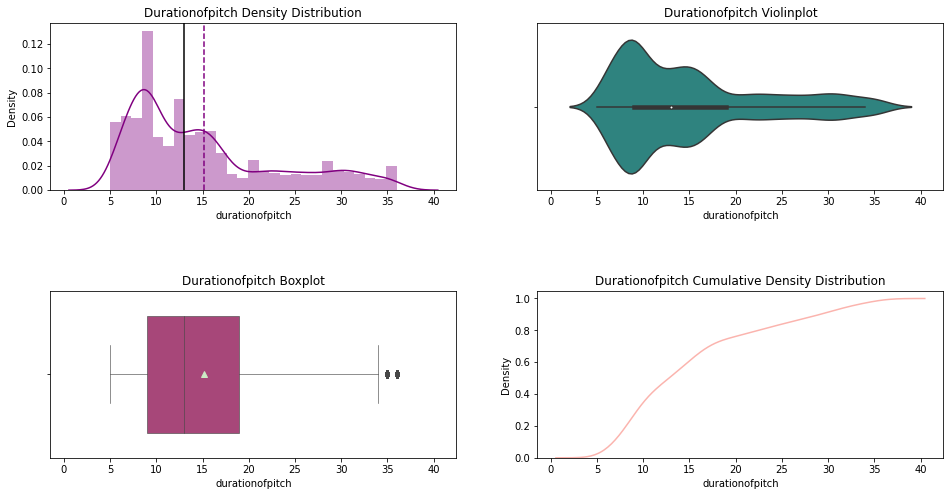

In [ ]:
feature_check('durationofpitch')

5 Point Summary of Numberofpersonvisiting Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


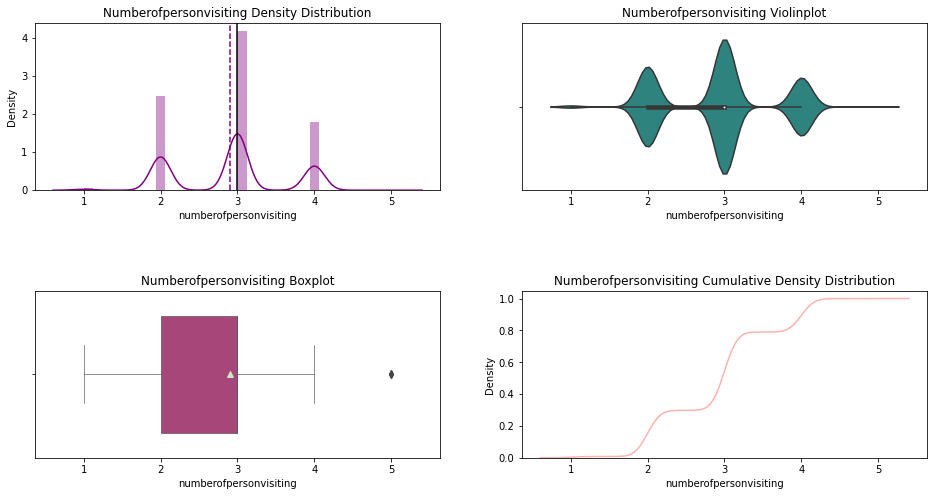

In [ ]:
feature_check('numberofpersonvisiting')        #Checking the number of persons visiting column 

The average number of vistors per time is 3. There is an outlier of about 5 persons visiting per time

5 Point Summary of Numberoffollowups Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


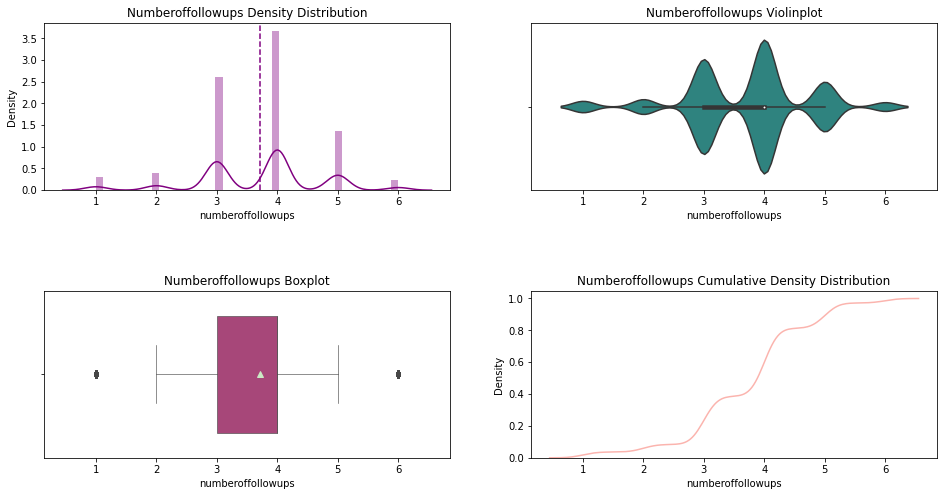

In [ ]:
feature_check('numberoffollowups')

In [ ]:
tourdata['numberoffollowups'].unique() #checking the unique values

array([ 3.,  4.,  2.,  5., nan,  1.,  6.])

In [ ]:
tourdata['numberoffollowups'] = tourdata['numberoffollowups'].fillna(0) #filling missing values with 0 as there may not have been follow up with those customers

Each sales agent had an average of about 4 followups. there are outlers that shows some agents made followup calls only once and anoter about 6times

5 Point Summary of Preferredpropertystar Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


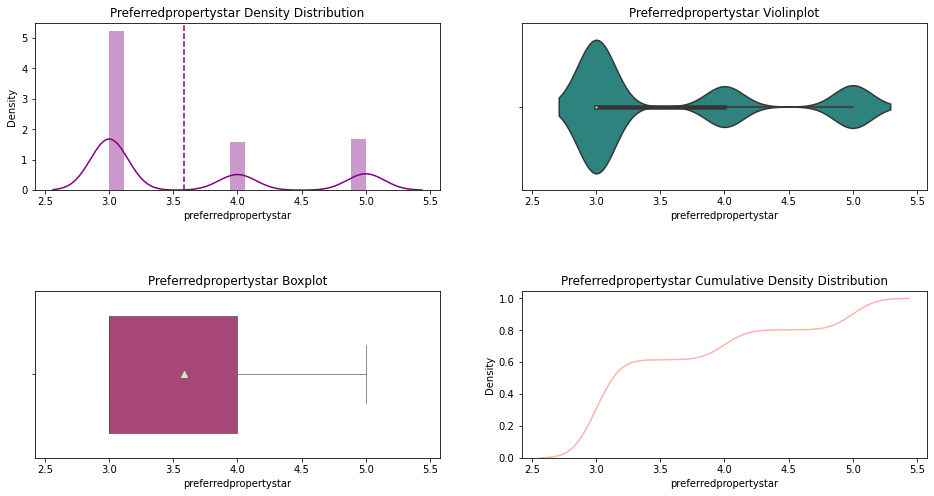

In [ ]:
feature_check('preferredpropertystar')   # checking the preferredpropertystar

In [ ]:
tourdata['preferredpropertystar'].unique()

array([ 3.,  4.,  5., nan])

In [ ]:
tourdata['preferredpropertystar'].value_counts()  #checking the value count for each star type nd estimating the mode

3.0    2991
5.0     956
4.0     913
Name: preferredpropertystar, dtype: int64

In [ ]:
tourdata['preferredpropertystar'] = tourdata['preferredpropertystar'].fillna(int(3))  # filling the missing values with the mode

many of the customers preferred the 3 star accomodation. This feature is mostly skewed to the right

5 Point Summary of Numberoftrips Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


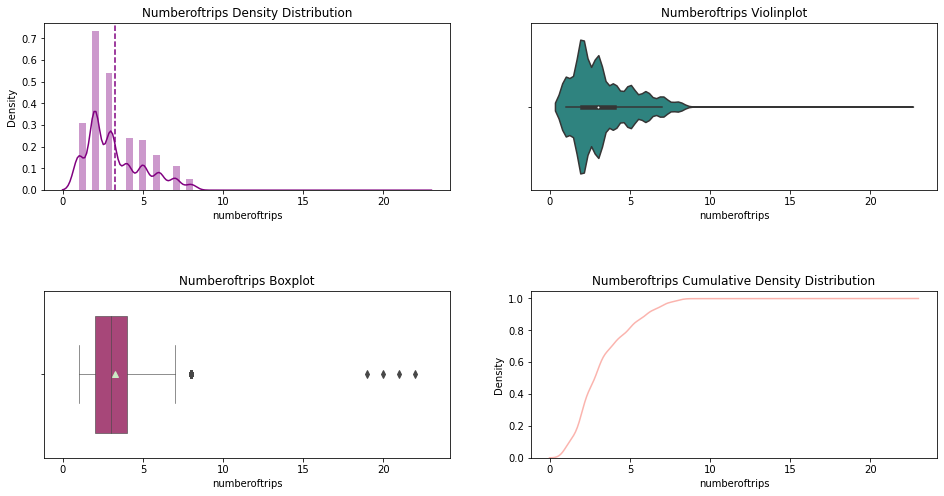

In [ ]:
feature_check('numberoftrips')  #checking the column number of trips

In [ ]:
tourdata['numberoftrips'].value_counts()

2.0     1464
3.0     1078
1.0      620
4.0      477
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: numberoftrips, dtype: int64

In [ ]:
tourdata['numberoftrips'] = tourdata['numberoftrips'].fillna(tourdata['numberoftrips'].median())  #filling the nan values with median value

This feature is mostly skewd to the right. The average number of trips for most customers is about 3-4trips. There are outliers that shows more that some customers may have taken trips more than 6times of the average trip.

5 Point Summary of Numberofchildrenvisiting Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


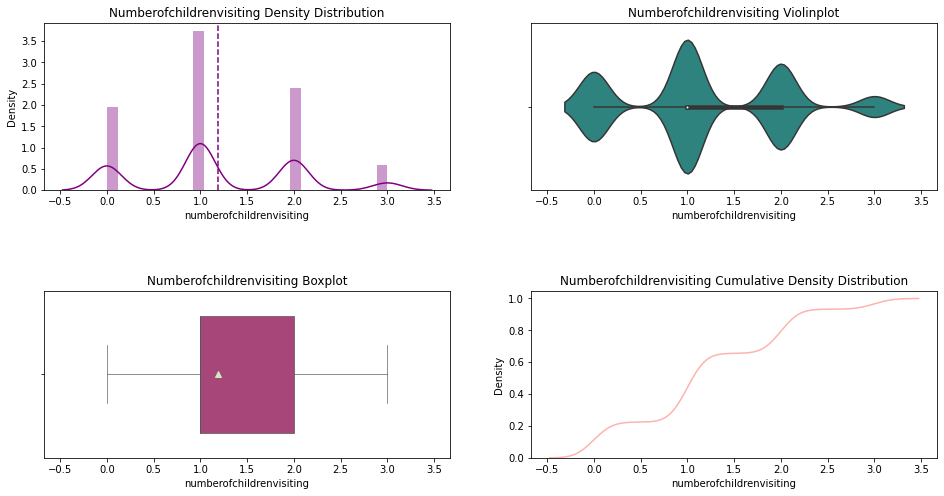

In [ ]:
feature_check('numberofchildrenvisiting')    #checkng the numberof chldren column

In [ ]:
tourdata['numberofchildrenvisiting'] = tourdata['numberofchildrenvisiting'].fillna(0) #filling the nan values with zero as visitors may not have come with kids

Most visitors went with one child on a trip

5 Point Summary of Monthlyincome Attribute:



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


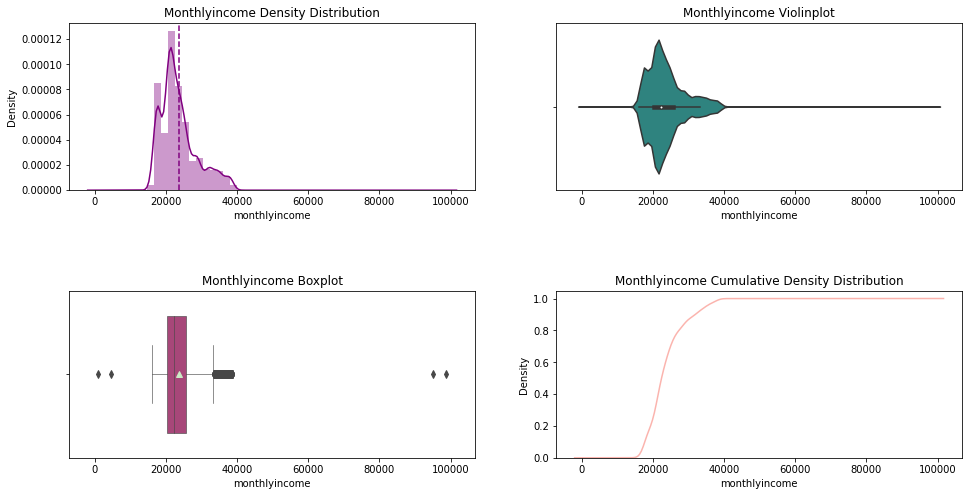

In [ ]:
feature_check('monthlyincome')  #checkng the monthly income feature

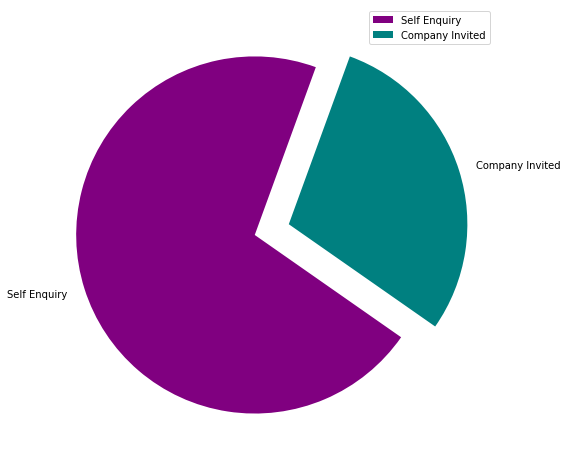

In [ ]:
plt.figure(figsize = (8,12))
plt.pie(tourdata['typeofcontact'].value_counts(),
        labels=tourdata['typeofcontact'].value_counts().index,
        colors=['purple', 'teal'], startangle=70, explode = (0.1,0.1)
        
       )
plt.legend();

In [ ]:
tourdata['monthlyincome'] = tourdata['monthlyincome'].fillna(tourdata['monthlyincome'].mean()) #replacing the missing values with the mean income

In [ ]:
tourdata['typeofcontact']= tourdata['typeofcontact'].fillna('Self Enquiry')

There are outliers showing that some clients earn way less and some others much more than the average income of most visitors. Most visitors earn an avrage of 23 thousand dollars

In [ ]:
tourdata.isnull().sum() # checking to see that there are no missing values

prodtaken                   0
age                         0
typeofcontact               0
citytier                    0
durationofpitch             0
occupation                  0
gender                      0
numberofpersonvisiting      0
numberoffollowups           0
productpitched              0
preferredpropertystar       0
maritalstatus               0
numberoftrips               0
passport                    0
pitchsatisfactionscore      0
owncar                      0
numberofchildrenvisiting    0
designation                 0
monthlyincome               0
dtype: int64

#### **Fixing Duplicates**

In [ ]:
#There are 141 duplicates in the dataset
tourdata.duplicated().sum() 

141

In [ ]:
#dropping duplicates
tourdata.drop_duplicates(inplace = True)
#The (inplace = True) will make sure that the method does NOT return a new DataFrame, but it will remove all duplicates from the original DataFrame.

#confirming if there are any duplicates
tourdata.duplicated().sum()

0

In [ ]:
tourdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   prodtaken                 4745 non-null   category
 1   age                       4745 non-null   float64 
 2   typeofcontact             4745 non-null   category
 3   citytier                  4745 non-null   category
 4   durationofpitch           4745 non-null   float64 
 5   occupation                4745 non-null   category
 6   gender                    4745 non-null   object  
 7   numberofpersonvisiting    4745 non-null   int64   
 8   numberoffollowups         4745 non-null   float64 
 9   productpitched            4745 non-null   category
 10  preferredpropertystar     4745 non-null   float64 
 11  maritalstatus             4745 non-null   category
 12  numberoftrips             4745 non-null   float64 
 13  passport                  4745 non-null   catego

In [ ]:
def cat_feature_check(data: pd.DataFrame, cat_columns, target, hue=None, perc=True): 
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(12,5*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'viridis', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

In [ ]:
tourdata['prodtaken'].unique()

[1, 0]
Categories (2, int64): [0, 1]

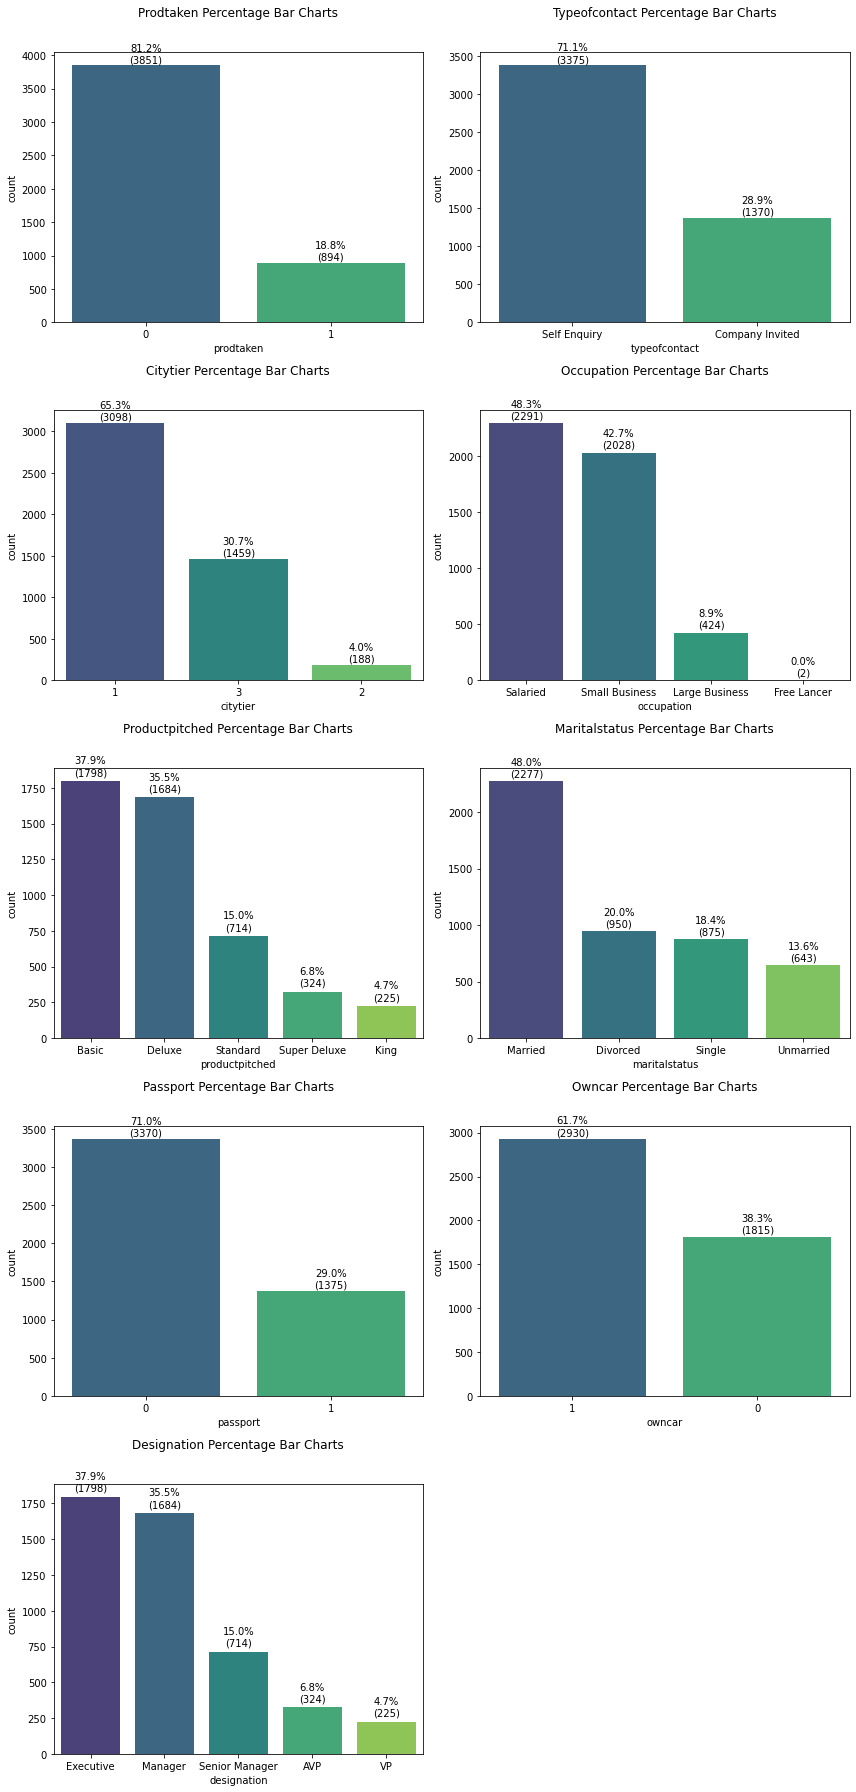

In [ ]:
category_columns = tourdata.select_dtypes(include = 'category').columns.tolist()
target_variable = 'prodtaken'
cat_feature_check(tourdata, category_columns, target_variable)

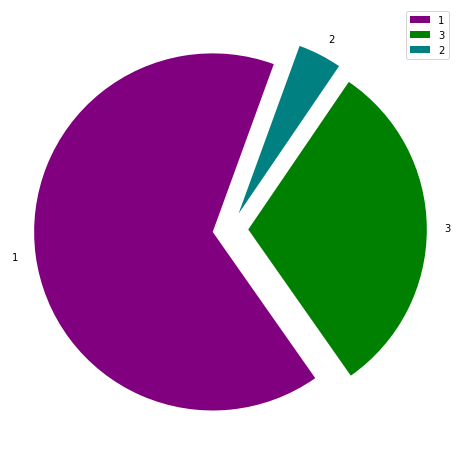

In [ ]:
plt.figure(figsize = (8,12))
plt.pie(tourdata['citytier'].value_counts(),
        labels=tourdata['citytier'].value_counts().index,
        colors=['purple', 'green','teal'], startangle=70, explode = (0.1,0.1,0.1)
        
       )
plt.legend();



In [ ]:
tourdata['occupation'].value_counts()

Salaried          2291
Small Business    2028
Large Business     424
Free Lancer          2
Name: occupation, dtype: int64

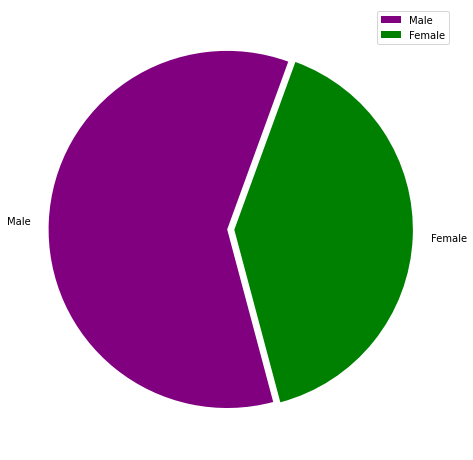

In [ ]:
plt.figure(figsize = (8,12))
plt.pie(tourdata['gender'].value_counts(),
        labels=tourdata['gender'].value_counts().index,
        colors=['purple', 'green'], startangle=70, explode = (0.02,0.02)
        
       )
plt.legend();

### **Bivariate Analysis**
-----------
This would check the interdependency of each feature against another

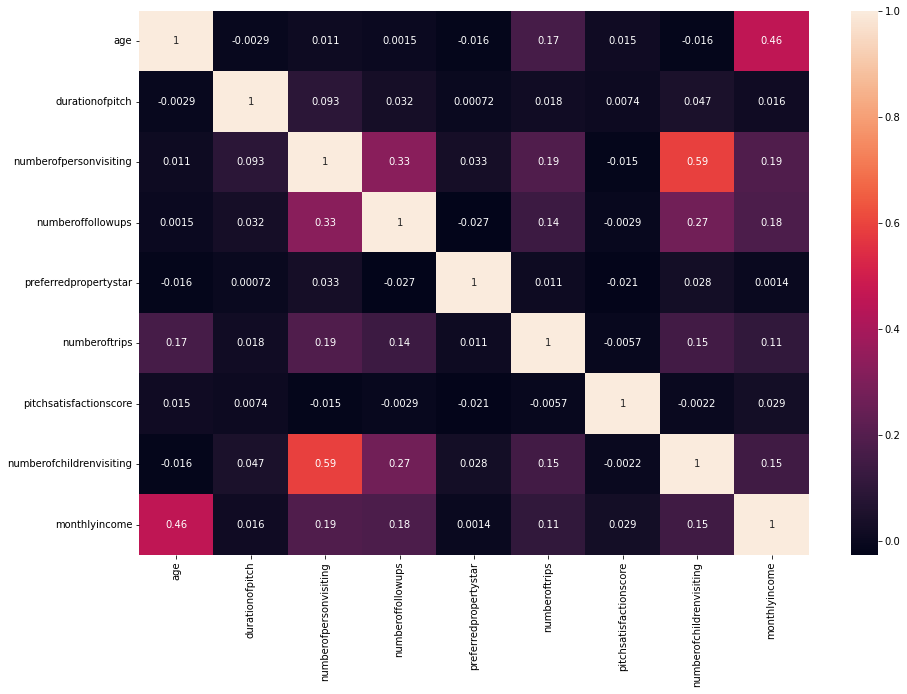

In [ ]:
plt.figure(figsize=(15,10))    #comparing the features against each other
sns.heatmap(tourdata.corr(), annot=True);
sns.set_palette(sns.color_palette("summer", 8))


<Figure size 1080x720 with 0 Axes>

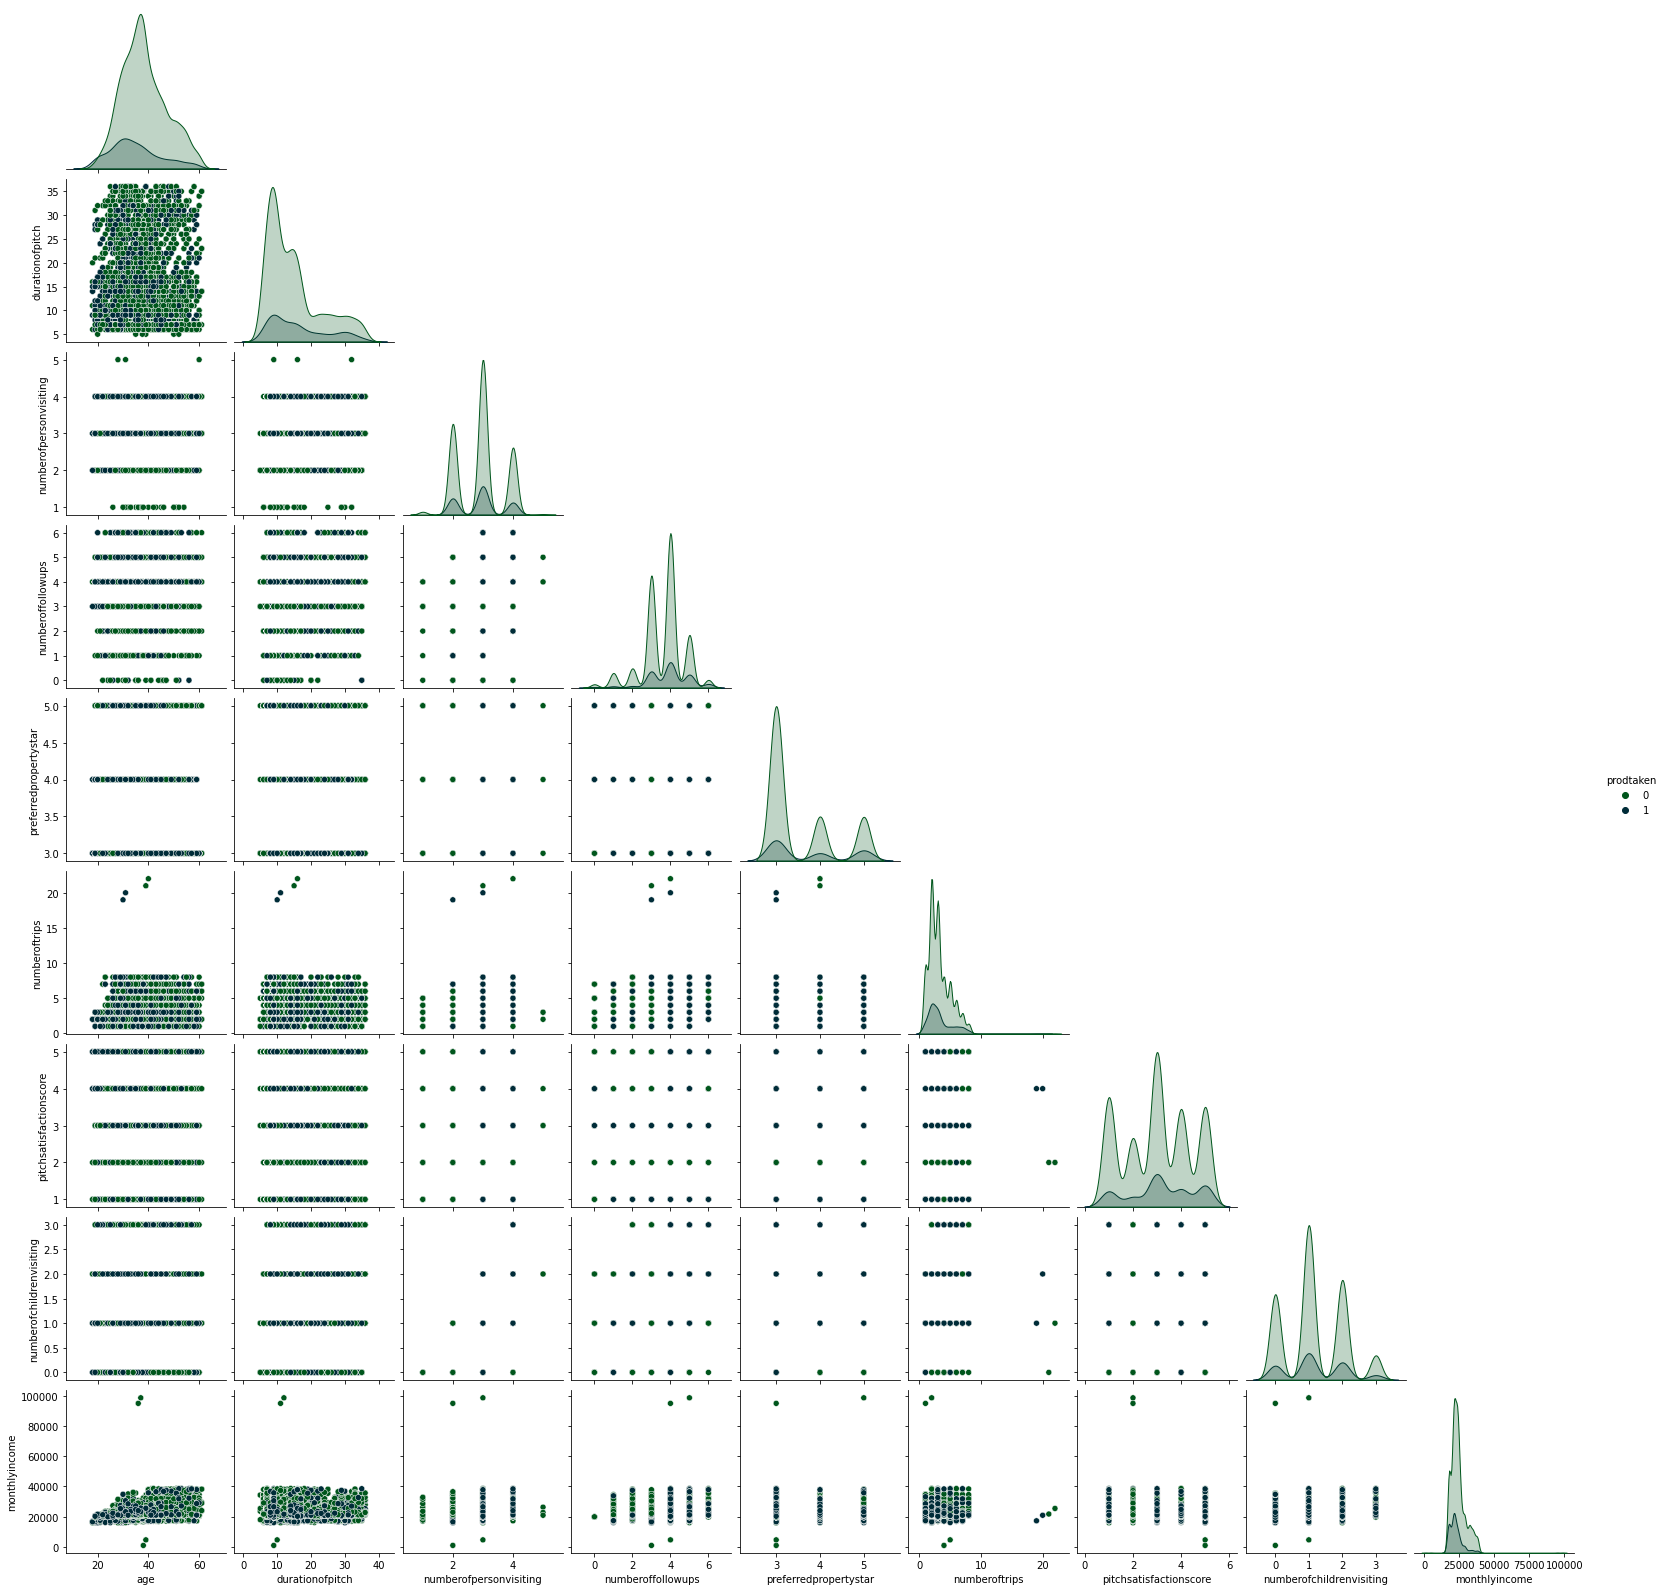

In [ ]:
plt.figure(figsize=(15,10))
sns.set_palette(sns.color_palette("ocean", 8))                #Comparing the target variable against other features
sns.pairplot(tourdata, hue="prodtaken",corner=True)
plt.show();

**Findings:**


*  `Monthlyincome` and `Age` has weak correlation
*  `Numberofchildrenvisiting` and number of person visiting has         correlation 
*  `Numberoffollowup` and number of person vsiting has very weak correlation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

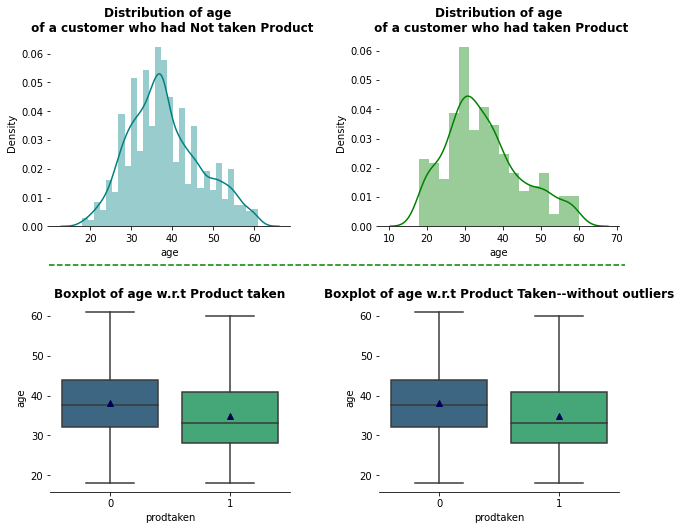

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

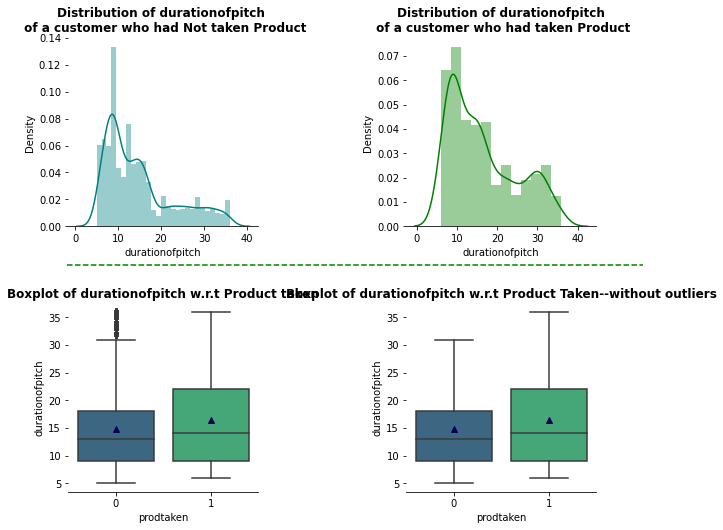

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

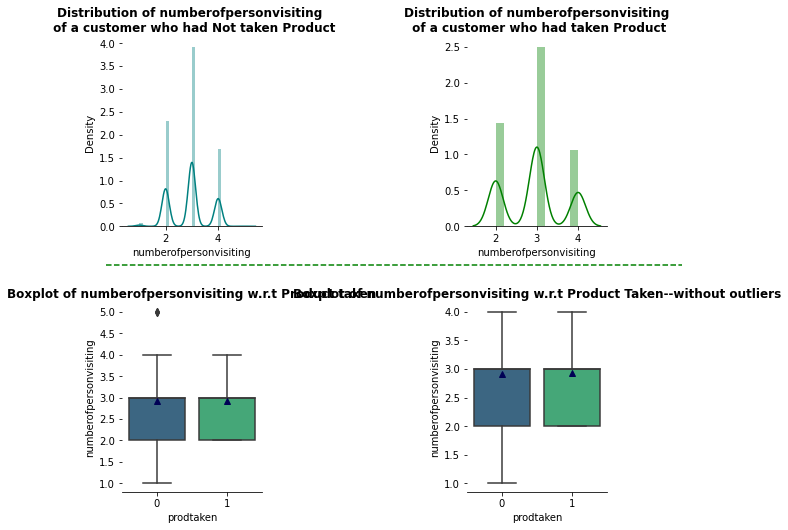

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

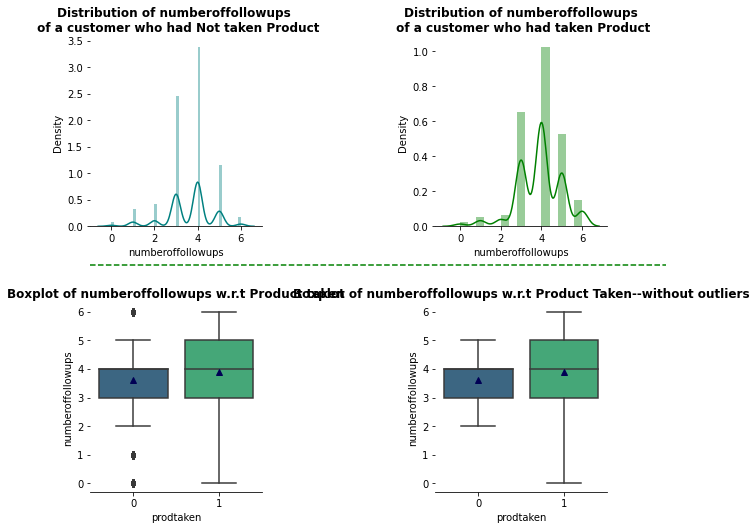

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

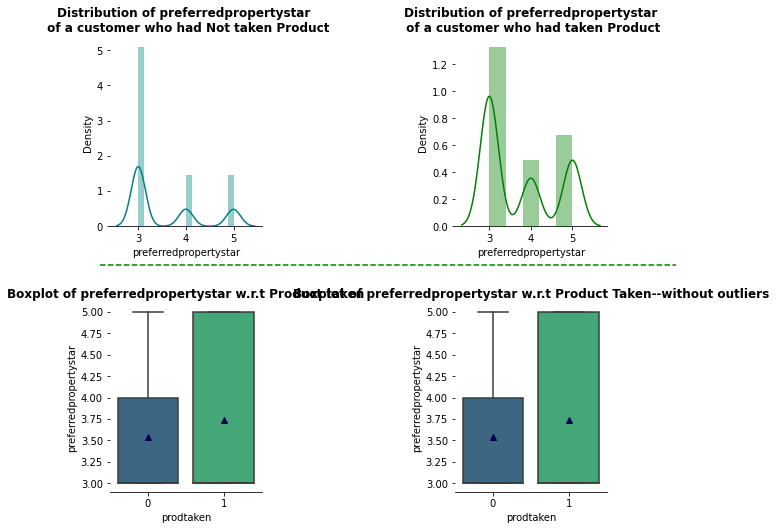

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

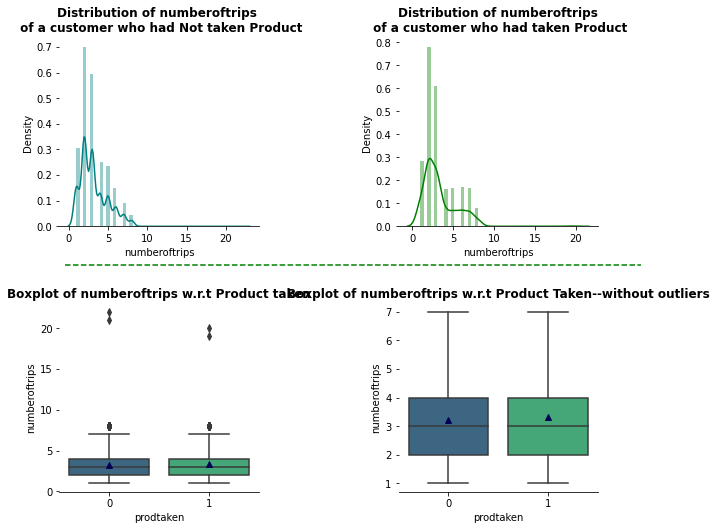

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

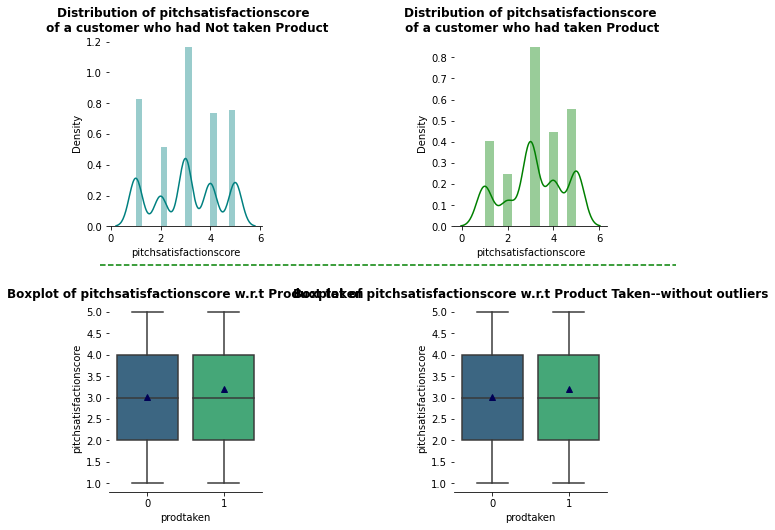

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

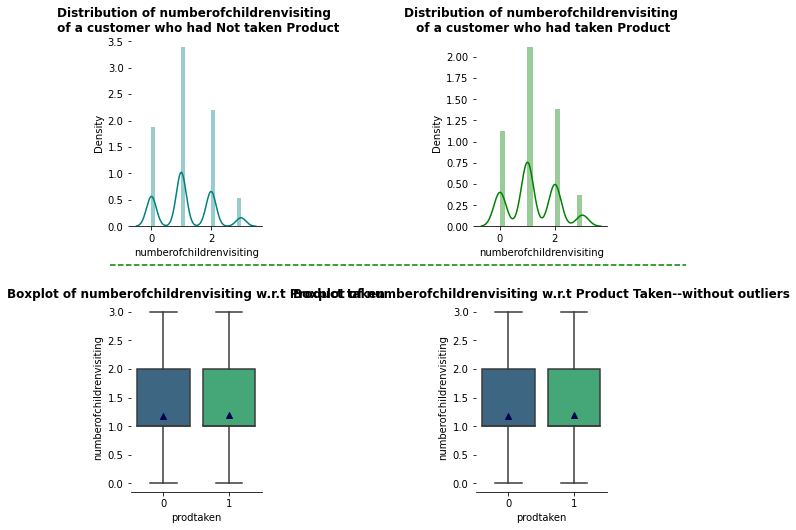

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

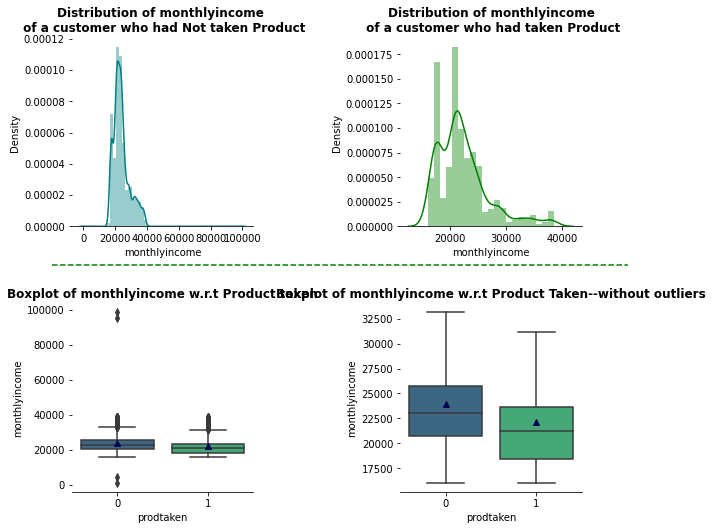

In [ ]:
def plot(x,target='prodtaken'):
    fig,axs = plt.subplots(2,2,figsize=(10,8))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(tourdata[(tourdata[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(tourdata[(tourdata[target] == 1)][x],ax=axs[0,1],color='green')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='green', linewidth=1.5,linestyle='--')
    fig.add_artist(line);
   
    sns.boxplot(tourdata[target],tourdata[x],ax=axs[1,0],palette='viridis',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken--without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(tourdata[target],tourdata[x],ax=axs[1,1],showfliers=False,palette='viridis',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=3)
    plt.show();
#select all quantitative columns for checking the spread
#list_col=  ['Age','DurationOfPitch','MonthlyIncome']
list_col=tourdata.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
    plot(list_col[j]);

*  Customers who purchased the product are mostly in `age` range of mid 20's to early 40s`
*  `Durationofpitch` suprisingly for customer who purchased product was `10- 40` min. 

*   There are some outliers in duration of pitch for customers who didn't take the 



product

*  `Numberoftrips` has some outliers like `17 -20.`

`Monthlyincome` has extreme outliers.Customers who purchased product are  earning on average `18000-23000` monthly




According to the bi-variate analysis, thet measures that may impact tendency of purchasing a travel package, are:
`Age` 
`Number of follow-ups`
`Preferred property rating`
`Income`
`City Tier`
`Occupation`
`Product Pitched`
`Marital Status`
`Passport`
`Designation` 

In [ ]:
def numeric_by_cat(category_columns: list, numeric_column: str, hue: str):
    num_cols = 2
    num_rows = int(len(category_columns) /2 + 1)

    plt.figure(figsize=(15, 8*num_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.set(palette="crest");
        sns.boxplot(data=tourdata, x=col, y=numeric_column, hue=hue, showfliers=True).set(title = numeric_column + ' vs. ' + col + ' by ' + hue);

MULTIVARIATE ANALYSIS: Comparing different features against the target variable and the other measures we feel are mportant from bivariate analysis

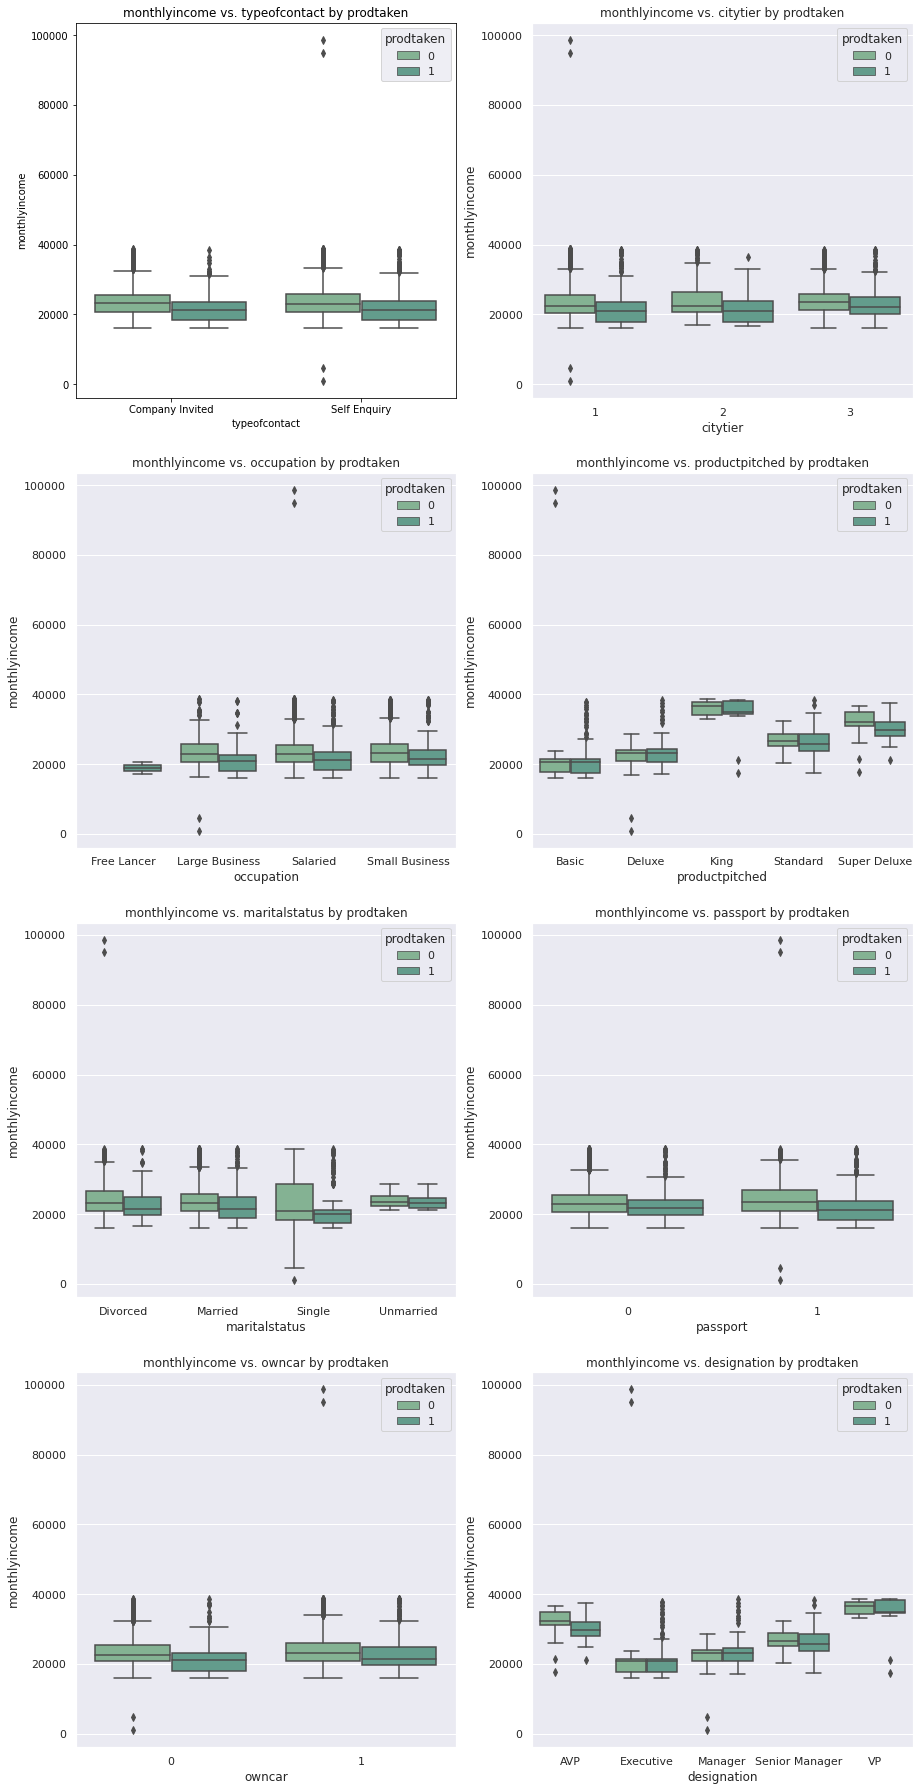

In [ ]:
category_columns = tourdata.select_dtypes(include='category').columns.tolist()   #CAT VARIABLE AGAINST INCOME
category_columns.remove('prodtaken')


numeric_by_cat(category_columns, 'monthlyincome', 'prodtaken')

**Findings:**

Overall, customers with the `income` range `17kK to 30K` has higher tendency to purchase the product.

`VPs` have higher income range, and the higher tendency to purchase travel package.

Younger `18-40` Customers have the higher tendency to purchase travel package where the properties are rated higher.


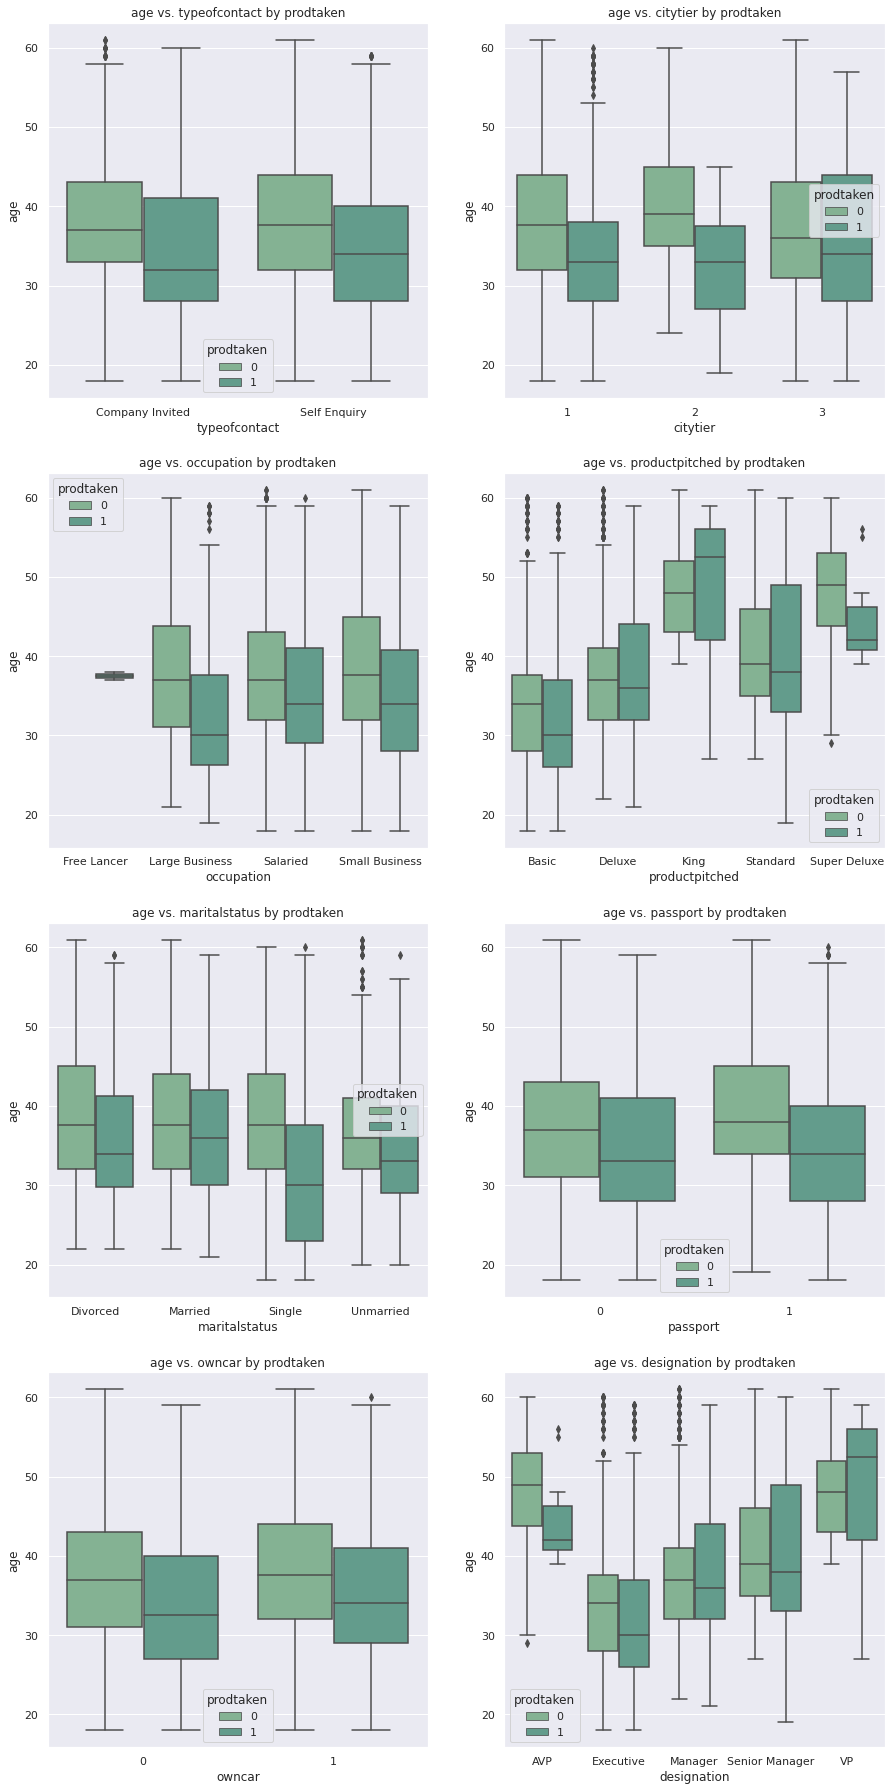

In [ ]:
category_columns = tourdata.select_dtypes(include='category').columns.tolist()
category_columns.remove('prodtaken')


numeric_by_cat(category_columns, 'age', 'prodtaken')

**Findings:**

Overall, the lower the `age`, more is the tendency to `purchase` the product.

`Older Customers` pitched about `King package` have the higher tendency to purchase travel package.

`VPs`, `Managers` and `Senior Managers` have the higher tendency to purchase travel package when the `age` is higher. This is because `age` is a bit correlated with designation.

`Older Customers` with salary range `25K+ to 50K` have the higher tendency to purchase `travel package`. Again this is because `age` is slightly correlated with `income.`

### **Multivariate Analysis cont'd**

Comparing Various Features and Impact against each other while considering the **Target Variable**

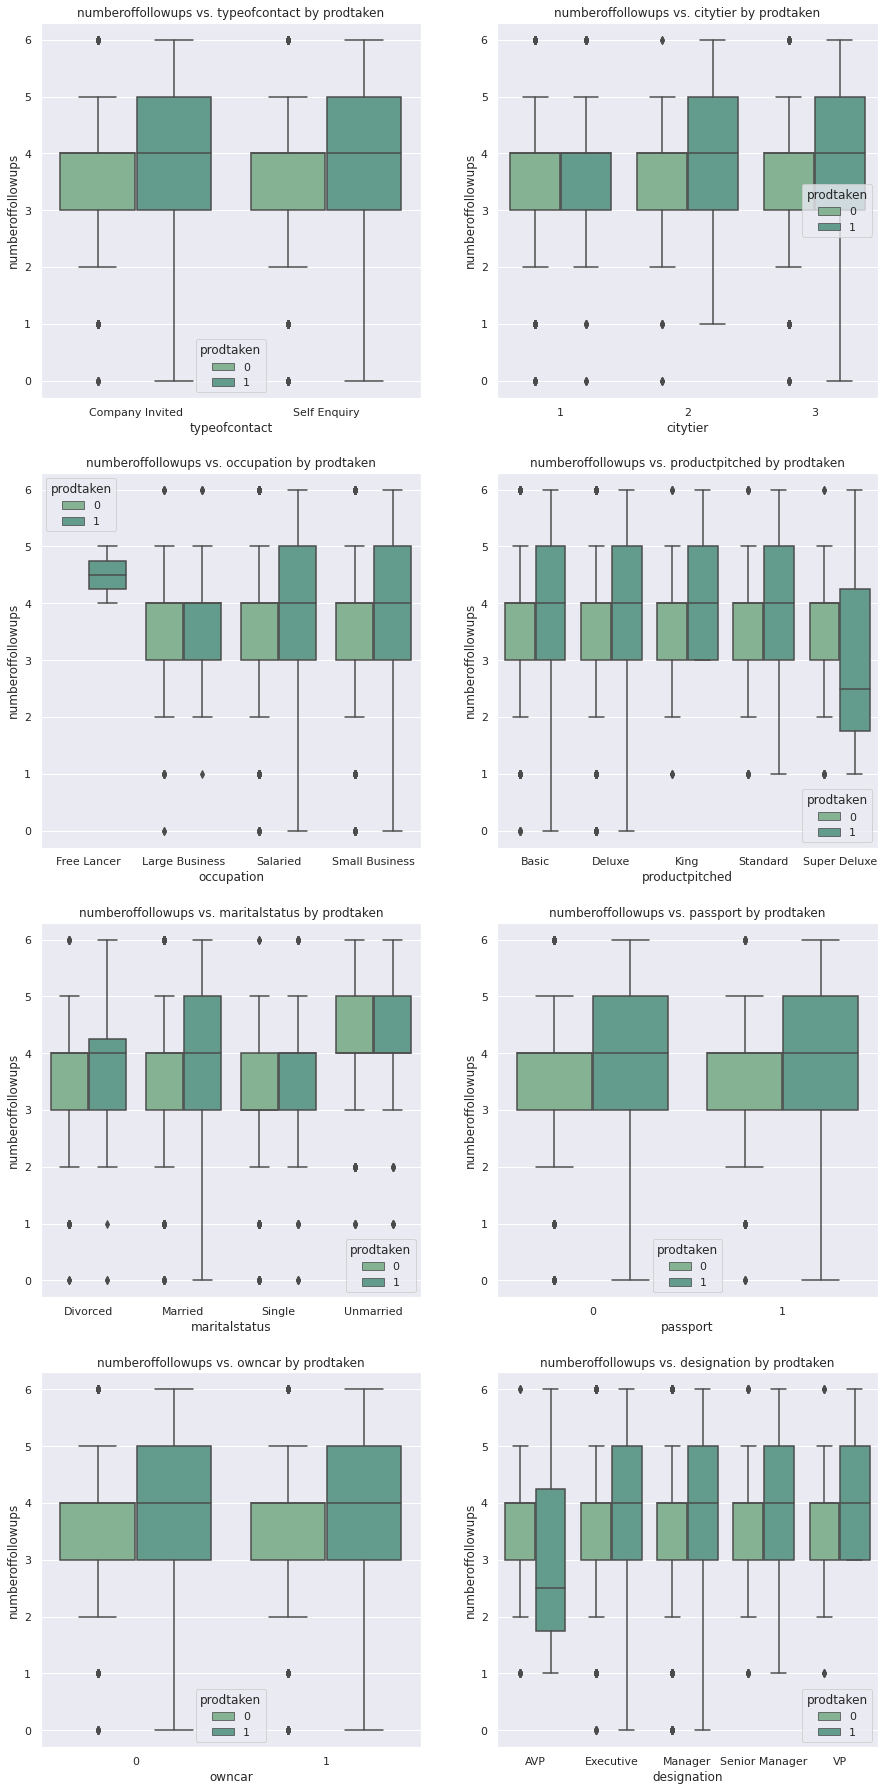

In [ ]:
category_columns = tourdata.select_dtypes(include='category').columns.tolist()
category_columns.remove('prodtaken')


numeric_by_cat(category_columns, 'numberoffollowups', 'prodtaken')

**Findings:**

Overall, the greater the number of `follow-ups`, the greater the likelihood of purchasing the `product`.

Customers in city `tier 2 and 3` have the higher tendency to purchase `travel package` where the number of `follow-ups` are higher.

Customers who are `freelancers`,`salaried`, or run a `small business` are more likely to purchase a `travel package`, where the number of `follow-ups` is higher.

Customers pitched about `Basic`, `Deluxe` and `King packages` have the higher tendency to purchase `travel package` where the number of `follow-ups` are higher.

`Executive`, `Manager` and `VPs` have the higher tendency to purchase `travel package` where the number of `follow-ups` are higher.



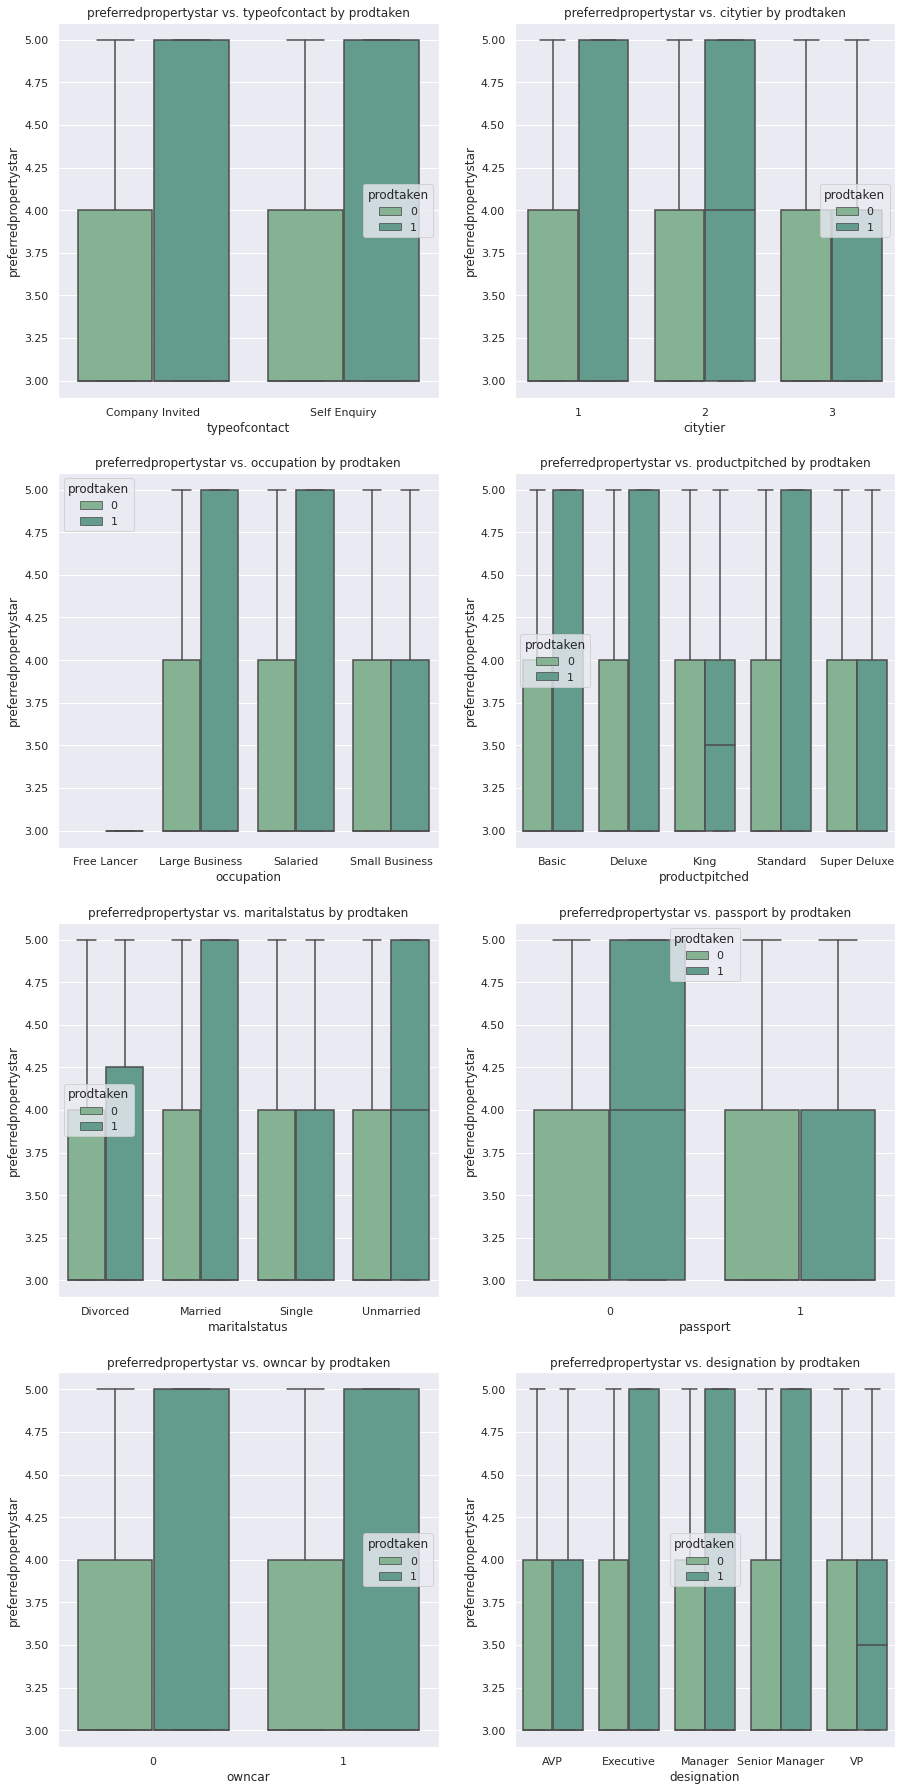

In [ ]:
category_columns = tourdata.select_dtypes(include='category').columns.tolist()
category_columns.remove('prodtaken')


numeric_by_cat(category_columns, 'preferredpropertystar', 'prodtaken')

**Findings:**

Overall, the higher the property rating, the greater the likelihood of purchasing the `product`.

Customers in city `tiers 1 and 2` are more likely to purchase travel packages with higher-rated properties.

Customers who are `salaried` or running `large business` have the higher tendency to purchase travel package where the properties are rated higher.

Male customers are more likely to purchase `travel packages` with higher-rated properties.

Customers who were pitched `Standard`, `Deluxe`, and `Basic packages` were more likely to purchase `travel packages` with higher-rated properties.

Customers without `passport` have the higher tendency to purchase travel package where the properties are rated higher.

`Executive`, `Manager` and `Senior Managers` have the higher tendency to purchase travel package where the properties are rated higher.

Younger `18-40` Customers have the higher tendency to purchase travel package where the properties are rated higher.

Customers with salary over 10k` have the higher tendency to purchase `travel package` where the properties are rated higher.


In [ ]:
# Creating a dataset out of the primary dataset for only the customers who bought travel products

cust_prodtaken = tourdata[tourdata['prodtaken'] == 1]
cust_prodtaken.head()

,prodtaken,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
14,1,28.000000,Self Enquiry,1,30.0,Salaried,Male,2,4.0,Basic,3.0,Single,6.0,1,2,0,0.0,Executive,17028.0
21,1,37.622265,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
24,1,34.000000,Self Enquiry,1,12.0,Small Business,Male,2,3.0,Basic,5.0,Single,3.0,0,2,1,1.0,Executive,17960.0


In [ ]:
def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):   #creating function to check percentage of products taken aganst actual number of product pitched in each category
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,5*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

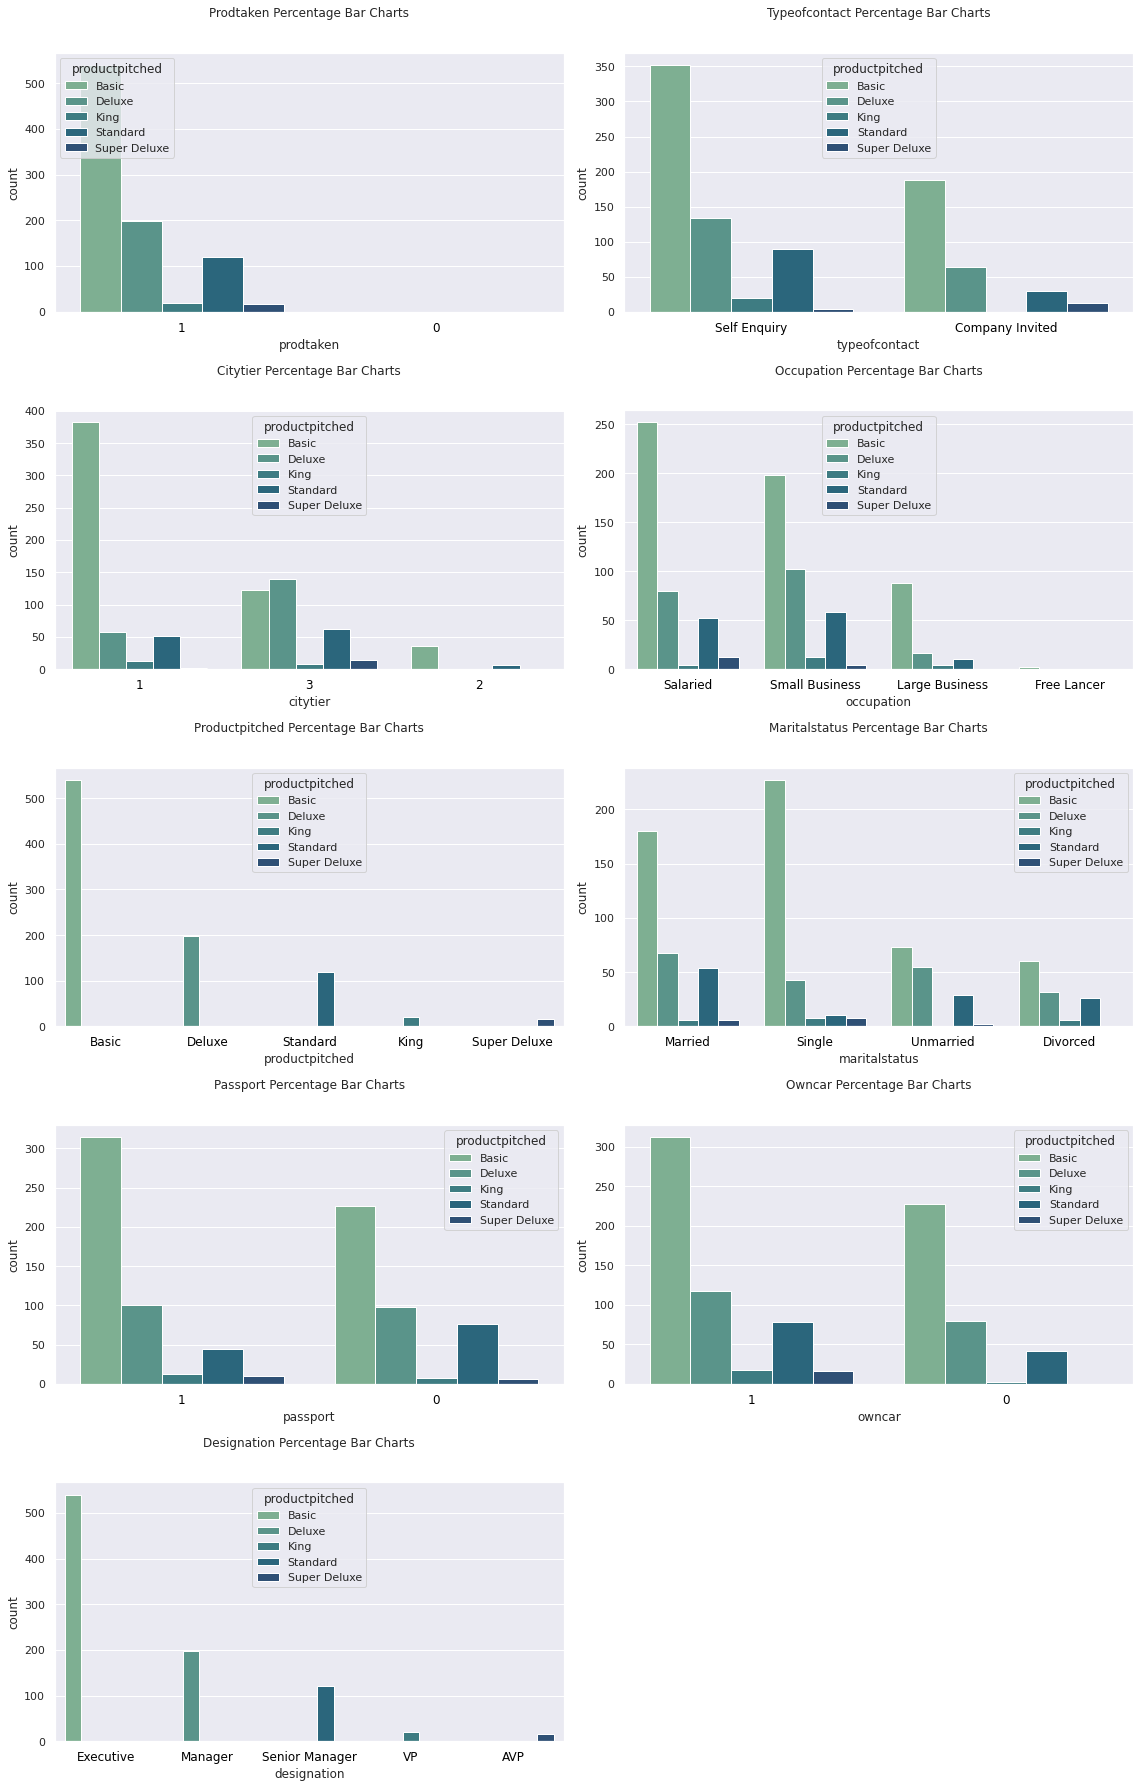

In [ ]:
category_columns = tourdata.select_dtypes(include='category').columns.tolist()
target_variable = 'productpitched'
perc_on_bar(cust_prodtaken, category_columns, 'prodtaken', hue=target_variable, perc=False)

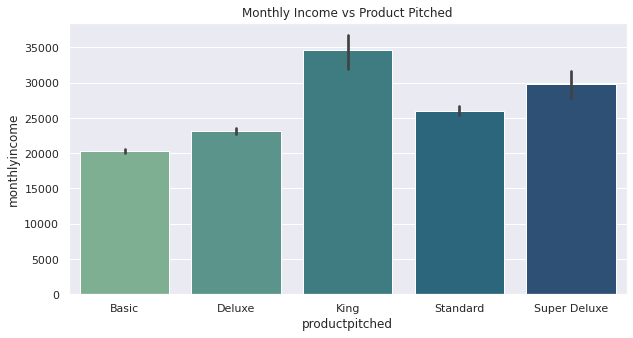

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y='monthlyincome',x='productpitched',data=cust_prodtaken, palette= 'crest').set_title('Monthly Income vs Product Pitched');

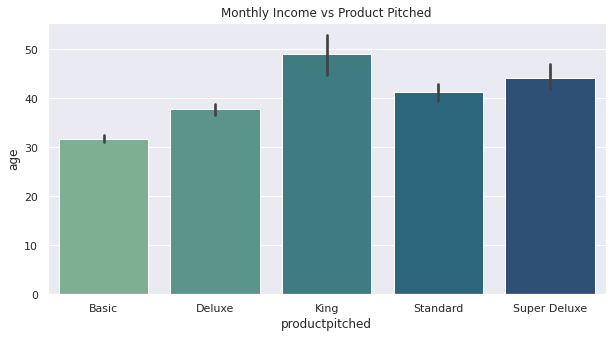

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y='age',x='productpitched',data=cust_prodtaken, palette ='crest').set_title('Monthly Income vs Product Pitched');

In [ ]:
cust_prodtaken.groupby(['productpitched']).agg({'monthlyincome':{'mean','min','max'},'age':{'mean','min','max'}})

monthlyincome                          age                 
                         min      max          mean   min   max       mean
productpitched                                                            
Basic                16009.0  37868.0  20306.425873  18.0  59.0  31.649591
Deluxe               17086.0  38525.0  23125.734560  21.0  59.0  37.685523
King                 17517.0  38537.0  34672.100000  27.0  59.0  48.900000
Standard             17372.0  38395.0  26016.433333  19.0  60.0  41.180186
Super Deluxe         21151.0  37502.0  29829.125000  39.0  56.0  44.125000

In [ ]:
cust_prodtaken[cust_prodtaken['productpitched']=='Basic'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
prodtaken,540.0,1.0,1.0,540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,540.0,NaN,NaN,NaN,31.649591,8.951326,18.0,26.0,30.0,37.0,59.0
typeofcontact,540,2,Self Enquiry,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citytier,540.0,3.0,1.0,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
durationofpitch,540.0,NaN,NaN,NaN,15.487037,7.855479,6.0,9.0,13.0,21.0,36.0
occupation,540,4,Salaried,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,540,2,Male,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numberofpersonvisiting,540.0,NaN,NaN,NaN,2.911111,0.702148,2.0,2.0,3.0,3.0,4.0
numberoffollowups,540.0,NaN,NaN,NaN,3.92037,1.022544,0.0,3.0,4.0,5.0,6.0
productpitched,540,1,Basic,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Findings:

Trend for most of the customers who purchased `Basic package`:

`Age` Group: `25 - 35`

Contacted by: `Self`

`Gender`: `Male`

`City Tier`: 1

`Occupation`: `Salaried`

`Number of Persons Visiting`: `~2 - 3`

`Marital Status`: `Single`

`Designation`: `Executives`

`MonthlyIncome` Mean: `~20K`

In [ ]:
 cust_prodtaken[cust_prodtaken['productpitched']=='Standard'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
prodtaken,120.0,1.0,1.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,120.0,NaN,NaN,NaN,41.180186,9.942065,19.0,33.0,38.0,49.0,60.0
typeofcontact,120,2,Self Enquiry,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citytier,120.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
durationofpitch,120.0,NaN,NaN,NaN,18.95,9.039456,6.0,11.0,17.0,27.5,36.0
occupation,120,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,120,2,Male,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numberofpersonvisiting,120.0,NaN,NaN,NaN,2.983333,0.709874,2.0,2.0,3.0,3.0,4.0
numberoffollowups,120.0,NaN,NaN,NaN,3.95,0.915322,1.0,3.0,4.0,5.0,6.0
productpitched,120,1,Standard,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN


FINDINGS:
Trend for most of the customers who purchased Standard package:

Age Group: 33 - 49 

Contacted by: Self

Gender: Male

City Tier: 3

Occupation: Small Business

Number of Persons Visiting: 2 - 3

Marital Status: Married

Designation: Senior Managers

Monthly Income Mean: ~26K

In [ ]:
cust_prodtaken[cust_prodtaken['productpitched']=='Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
prodtaken,198.0,1.0,1.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,198.0,NaN,NaN,NaN,37.685523,8.439475,21.0,32.0,36.0,44.0,59.0
typeofcontact,198,2,Self Enquiry,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citytier,198.0,2.0,3.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
durationofpitch,198.0,NaN,NaN,NaN,17.893939,9.245872,6.0,9.0,15.0,26.0,36.0
occupation,198,3,Small Business,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,198,2,Male,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numberofpersonvisiting,198.0,NaN,NaN,NaN,2.954545,0.707433,2.0,2.0,3.0,3.0,4.0
numberoffollowups,198.0,NaN,NaN,NaN,3.893939,1.189576,0.0,3.0,4.0,5.0,6.0
productpitched,198,1,Deluxe,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


FINDINGS:
Trend for most of the customers who purchased Deluxe package:

Age Group: 21 - 44

Contacted by: Self

Gender: Male

City Tier: 3

Occupation: Small Business

Number of Persons Visiting: 2 - 3

Marital Status: Married

Designation: Manager

Monthly Income Mean: ~23K

In [ ]:
cust_prodtaken[cust_prodtaken['productpitched']=='Super Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
prodtaken,16.0,1.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,16.0,NaN,NaN,NaN,44.125,5.188127,39.0,40.75,42.0,46.25,56.0
typeofcontact,16,2,Company Invited,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citytier,16.0,2.0,3.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
durationofpitch,16.0,NaN,NaN,NaN,19.75,7.28011,8.0,15.75,19.0,22.5,31.0
occupation,16,2,Salaried,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,16,2,Male,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numberofpersonvisiting,16.0,NaN,NaN,NaN,2.75,0.68313,2.0,2.0,3.0,3.0,4.0
numberoffollowups,16.0,NaN,NaN,NaN,3.0,1.788854,1.0,1.75,2.5,4.25,6.0
productpitched,16,1,Super Deluxe,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


FINDINGS:
Trend for most of the customers who purchased Super Deluxe package:

Age Group: 39 - 45
Contacted by: Company

Gender: Male

City Tier: 3

Occupation: Salaried

Number of Persons Visiting: 2 - 3

Marital Status: Single

Designation: AVP

Monthly Income Mean: ~30K

In [ ]:
cust_prodtaken[cust_prodtaken['productpitched']=='King'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
prodtaken,20.0,1.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
typeofcontact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citytier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
durationofpitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numberofpersonvisiting,20.0,NaN,NaN,NaN,2.9,0.718185,2.0,2.0,3.0,3.0,4.0
numberoffollowups,20.0,NaN,NaN,NaN,4.3,1.128576,3.0,3.0,4.0,5.0,6.0
productpitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**FINDINGS:**

Trend for most of the customers who purchased King package:

Age Group: 42 - 56

Contacted by: Self

Gender: Female

City Tier: 1

Occupation: Small Business

Number of Persons Visiting: 2 - 3

Marital Status: Single

Designation: VP

Monthly Income Mean: ~35K

**PATTERNS DISCOVERED:**

Customer of over 18yrs of age purchased the product taken, followed by customers in their 30's and 40's

People with monthly income of 17K - 25K purchased product, followed by customers in income range 25K - 50K.

people 2 - 4 travelers purchased some product. Most of the customers who bought the product were Executive and Senior Manager.

Customers who were followed up 6 times had purchased the product
Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from city tier 2,3.

Customers who were pitched basic package mostly bought the product, followed by standard. We can understand that this is because its cheaper.

Mostly Customers who have passport bought the product which means that it may have served more as a means of identification.

Single and unmarried people has higher chance of purchasing the travel package.

Customers who took 7 - 8 trips had higher chances of purchasing a product.

Gender, number of children visiting, having a car seem to be insignificant.

Products were sold when followed up many times, with higher duration of product pitch, and when Basic Package was offered.

## **Preparing Data for Modelling**

**Columns to drop**

Since the new customers will be first analyzed via model and then contacted, the customer interaction data would not be available. It is sensible to drop the features related to customer interactions. Those columns/features are: durationofpitch, numberoffollowups(as predicton would not involve direct contact), productpitched, pitchsatisfactionscore.

typeofcontact can also be dropped since the new customers will all be contacted by the company.

In [ ]:
backup = tourdata.copy()    #creating a backup copy of the cleaned dataset for modellng 


In [ ]:
# Dropping unnecessary columns from the df dataframe
tourdata.drop(columns=['durationofpitch', 'numberoffollowups', 'productpitched', 'pitchsatisfactionscore', 'typeofcontact'], inplace=True)

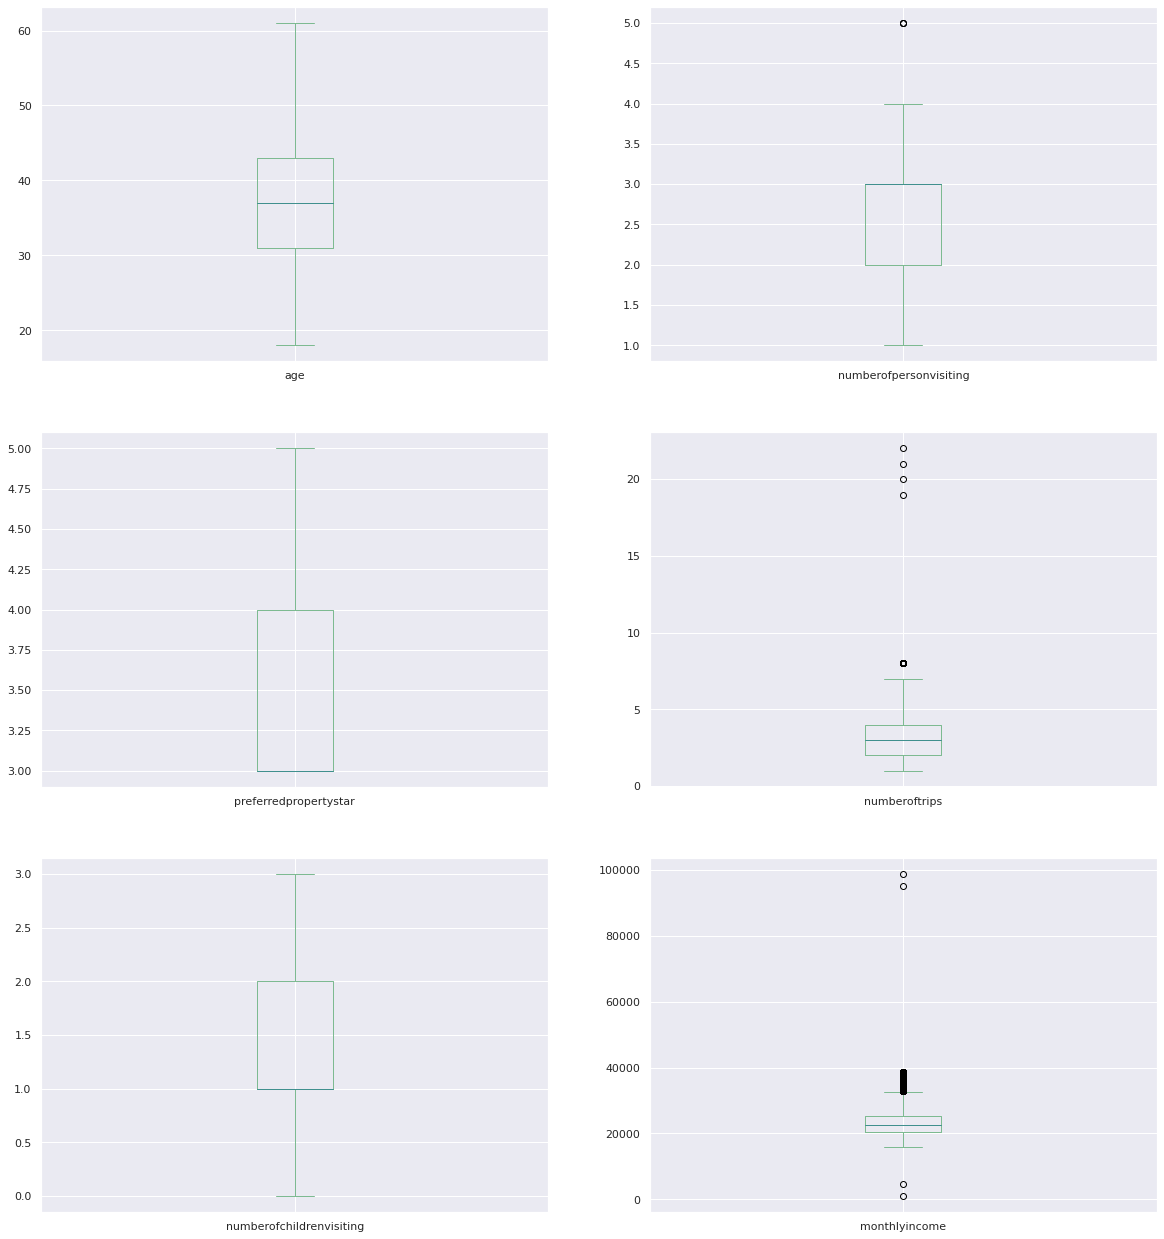

In [ ]:
#checking the outliers in a dataset using boxplot
tourdata.plot(kind = 'box', subplots = True,layout = (4,2) , sharex = False, sharey = False)
plt.rcParams['figure.figsize'] = (10,8)  #checking for outliers in each feature in the data

In [ ]:
tourdata[(tourdata['monthlyincome'] > 40000) | (tourdata['monthlyincome'] < 10000)]

,prodtaken,age,citytier,occupation,gender,numberofpersonvisiting,preferredpropertystar,maritalstatus,numberoftrips,passport,owncar,numberofchildrenvisiting,designation,monthlyincome
38,0,36.0,1,Salaried,Female,2,3.0,Divorced,1.0,1,1,0.0,Executive,95000.0
142,0,38.0,1,Large Business,Female,2,3.0,Single,4.0,1,0,0.0,Manager,1000.0
2482,0,37.0,1,Salaried,Female,3,5.0,Divorced,2.0,1,1,1.0,Executive,98678.0
2586,0,39.0,1,Large Business,Female,3,3.0,Single,5.0,1,0,1.0,Manager,4678.0


In [ ]:
tourdata[(tourdata['numberoftrips'] > 10)]

,prodtaken,age,citytier,occupation,gender,numberofpersonvisiting,preferredpropertystar,maritalstatus,numberoftrips,passport,owncar,numberofchildrenvisiting,designation,monthlyincome
385,1,30.0,1,Large Business,Male,2,3.0,Single,19.0,1,1,1.0,Executive,17285.0
816,0,39.0,1,Salaried,Male,3,4.0,Unmarried,21.0,0,1,0.0,Manager,21782.0
2829,1,31.0,1,Large Business,Male,3,3.0,Single,20.0,1,1,2.0,Executive,20963.0
3260,0,40.0,1,Salaried,Male,4,4.0,Unmarried,22.0,0,1,1.0,Manager,25460.0


In [ ]:
def fix_outliers(data,col):

    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker                                                         
    # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def fix_outliers_all(data, col_list):
    
    for c in col_list:
        data = fix_outliers(data,c)
        
    return data

In [ ]:
outlier_fix_col = ['monthlyincome', 'numberoftrips']



# treating outliers
tourdata = fix_outliers_all(tourdata, outlier_fix_col)

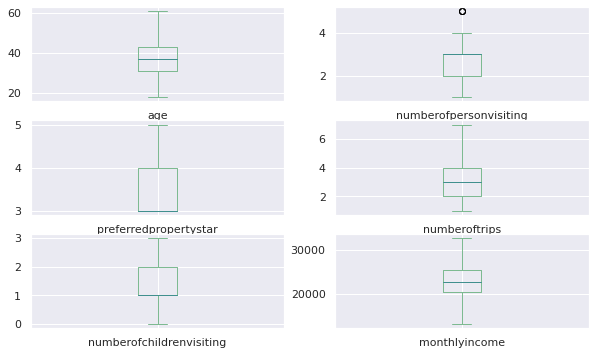

In [ ]:
#checking the outliers in a dataset using boxplot
tourdata.plot(kind = 'box', subplots = True,layout = (4,2) , sharex = False, sharey = False)
plt.rcParams['figure.figsize'] = (10,8)  #checking for outliers in each feature in the data

In [ ]:
#splitting te dataset

X = tourdata.drop(['prodtaken'], axis=1)
y = tourdata['prodtaken']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1, stratify=y)


print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True)*100)
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True)*100)

Shape of Training set :  (3796, 13)
Shape of test set :  (949, 13)
Percentage of classes in training set:
 0    81.164384
1    18.835616
Name: prodtaken, dtype: float64
Percentage of classes in test set:
 0    81.13804
1    18.86196
Name: prodtaken, dtype: float64


In [ ]:
X_train.describe()  #checking the central tendencies of training set

,age,numberofpersonvisiting,preferredpropertystar,numberoftrips,numberofchildrenvisiting,monthlyincome
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000
mean,37.700816,2.921496,3.571654,3.199420,1.195732,23419.100836
std,9.124825,0.722061,0.797147,1.704991,0.866835,4524.926693
min,18.000000,1.000000,3.000000,1.000000,0.000000,13105.000000
25%,31.000000,2.000000,3.000000,2.000000,1.000000,20562.000000
50%,37.000000,3.000000,3.000000,3.000000,1.000000,22710.000000
75%,43.000000,3.000000,4.000000,4.000000,2.000000,25474.000000
max,61.000000,5.000000,5.000000,7.000000,3.000000,32761.000000


In [ ]:
X_test.describe()  #comparing the central tendencies to ensure they have similar distribution

,age,numberofpersonvisiting,preferredpropertystar,numberoftrips,numberofchildrenvisiting,monthlyincome
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,37.116429,2.873551,3.615385,3.169652,1.108535,23110.387807
std,9.055974,0.731182,0.807804,1.684405,0.856731,4368.450815
min,18.000000,1.000000,3.000000,1.000000,0.000000,13105.000000
25%,30.000000,2.000000,3.000000,2.000000,0.000000,20249.000000
50%,36.000000,3.000000,3.000000,3.000000,1.000000,22351.000000
75%,43.000000,3.000000,4.000000,4.000000,2.000000,25124.000000
max,61.000000,4.000000,5.000000,7.000000,3.000000,32761.000000


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)    #Converting all categorical varables to numeric  for modelling using get dummies method
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_train.T

,788,130,3183,4574,3697,2183,2068,2576,1147,508,...,2242,868,4804,3206,3384,3047,4481,994,121,3575
age,37.622265,43.0,28.0,59.0,34.0,45.0,28.000000,32.0,49.0,35.0,...,56.0,28.0,55.0,27.0,40.0,46.0,35.0,52.0,33.0,35.0
numberofpersonvisiting,2.000000,3.0,3.0,3.0,4.0,3.0,2.000000,4.0,2.0,2.0,...,3.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0
preferredpropertystar,3.000000,3.0,3.0,3.0,4.0,3.0,3.000000,3.0,5.0,3.0,...,3.0,5.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0
numberoftrips,4.000000,5.0,2.0,2.0,2.0,4.0,7.000000,5.0,2.0,2.0,...,3.0,2.0,2.0,7.0,2.0,3.0,3.0,3.0,1.0,3.0
numberofchildrenvisiting,1.000000,2.0,2.0,1.0,1.0,0.0,1.000000,1.0,0.0,0.0,...,0.0,2.0,2.0,1.0,3.0,2.0,2.0,0.0,1.0,2.0
monthlyincome,18660.000000,19739.0,22905.0,21058.0,23825.0,17270.0,23621.271438,23237.0,18211.0,21646.0,...,17942.0,18196.0,29180.0,20720.0,22582.0,20952.0,24952.0,28247.0,21146.0,23741.0
citytier_2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
citytier_3,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
occupation_Large Business,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
occupation_Salaried,1.000000,0.0,1.0,1.0,0.0,0.0,0.000000,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
X_test.T

,3933,619,4136,1281,2304,3171,4775,2194,3203,4338,...,2115,3020,1221,1021,4429,4486,4433,2047,4417,3592
age,39.0,37.622265,38.0,35.0,34.0,19.0,47.0,24.000000,46.0,58.0,...,29.0,28.0,45.0,25.000000,36.0,30.0,30.0,37.0,35.0,40.0
numberofpersonvisiting,3.0,2.000000,3.0,2.0,3.0,4.0,4.0,2.000000,3.0,3.0,...,2.0,3.0,3.0,3.000000,3.0,4.0,4.0,2.0,3.0,4.0
preferredpropertystar,3.0,5.000000,3.0,3.0,3.0,3.0,5.0,3.000000,4.0,3.0,...,3.0,3.0,3.0,5.000000,3.0,3.0,3.0,5.0,3.0,5.0
numberoftrips,7.0,2.000000,3.0,2.0,2.0,3.0,3.0,2.000000,3.0,5.0,...,7.0,2.0,4.0,4.000000,3.0,6.0,3.0,1.0,3.0,4.0
numberofchildrenvisiting,1.0,0.000000,2.0,0.0,0.0,2.0,2.0,0.000000,1.0,1.0,...,1.0,2.0,2.0,0.000000,2.0,2.0,3.0,0.0,2.0,3.0
monthlyincome,22622.0,23621.271438,30863.0,20813.0,20714.0,19729.0,32761.0,23621.271438,20855.0,32761.0,...,17800.0,23020.0,25748.0,23621.271438,19959.0,23013.0,21398.0,17782.0,21369.0,24055.0
citytier_2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
citytier_3,0.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.000000,0.0,1.0,...,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
occupation_Large Business,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
occupation_Salaried,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
dtree_model=DecisionTreeClassifier(random_state=1)
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
ypred = dtree_model.predict(X_test)
ypred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

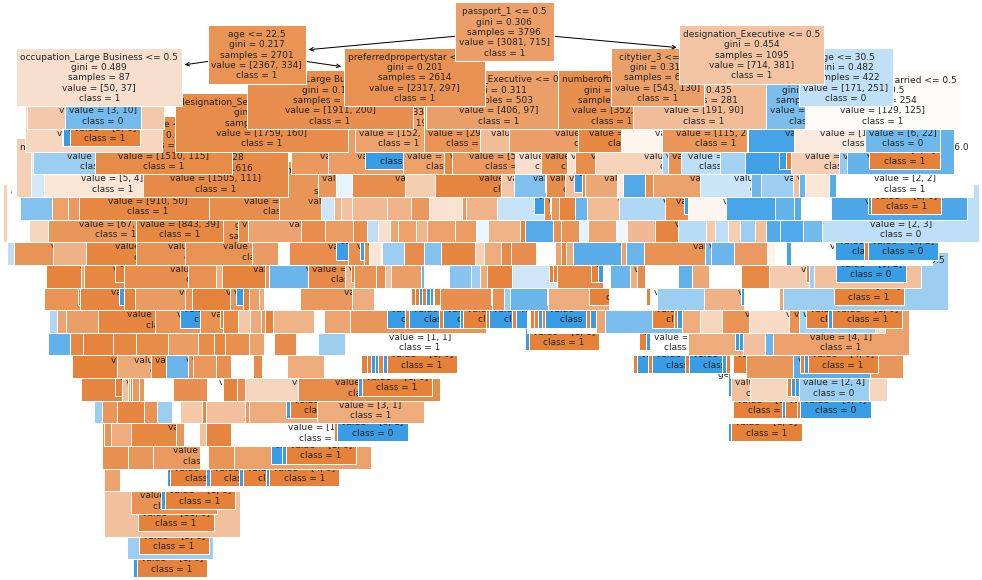

In [ ]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_model,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


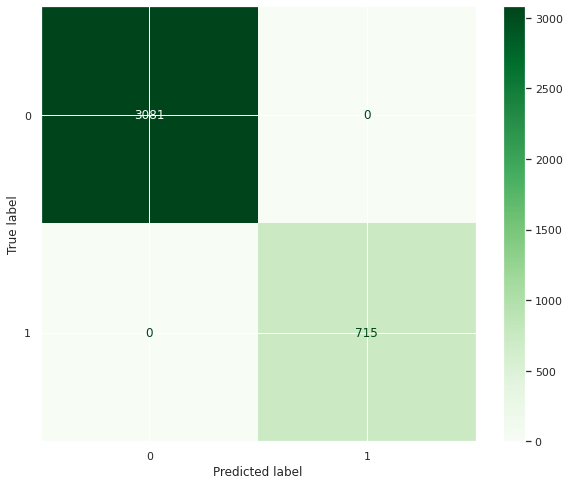

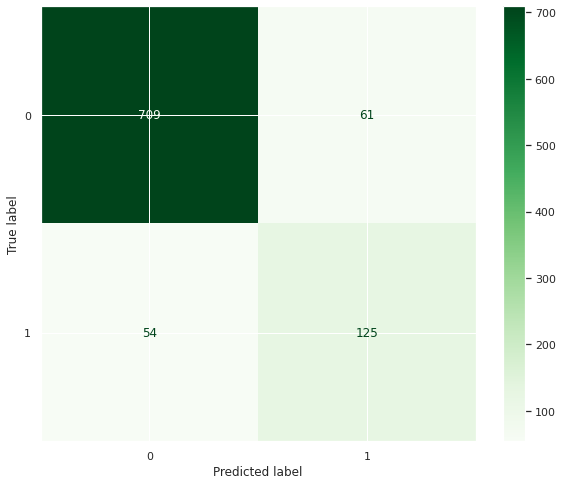

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(dtree_model, X_train, y_train, cmap = 'Greens')
disp = plot_confusion_matrix(dtree_model, X_test, y_test, cmap = 'Greens')

plt.show();

In [ ]:
accuracy_dtree = accuracy_score(y_test, ypred)
accuracy_dtree

0.8788198103266597

In [ ]:
rf_model = RandomForestClassifier(n_estimators= 50)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
ypred2 =  rf_model.predict(X_test)
ypred2

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


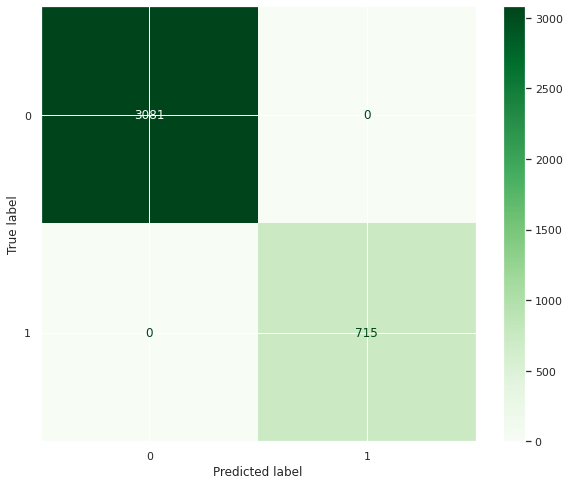

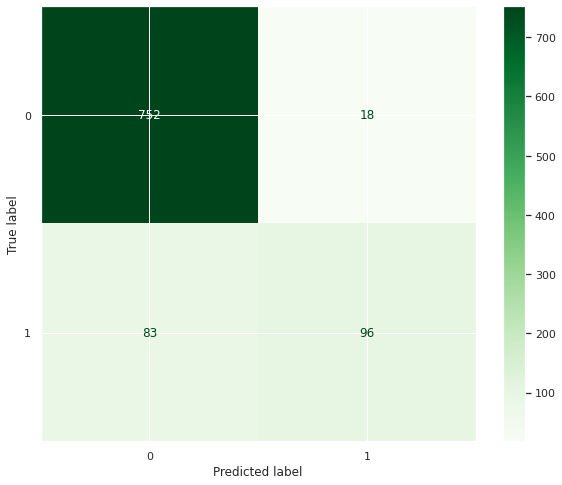

In [ ]:
disp = plot_confusion_matrix(rf_model, X_train, y_train, cmap = 'Greens')
disp = plot_confusion_matrix(rf_model, X_test, y_test, cmap = 'Greens')

In [ ]:
accuracy_rf = accuracy_score(y_test, ypred2)
accuracy_rf

0.8935721812434141

In [ ]:
svm_model = svm.SVC(gamma= 0.1, random_state=50)

In [ ]:
svm_model.fit(X_train, y_train)

SVC(gamma=0.1, random_state=50)

In [ ]:
svm_ypred = svm_model.predict(X_test)
svm_ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


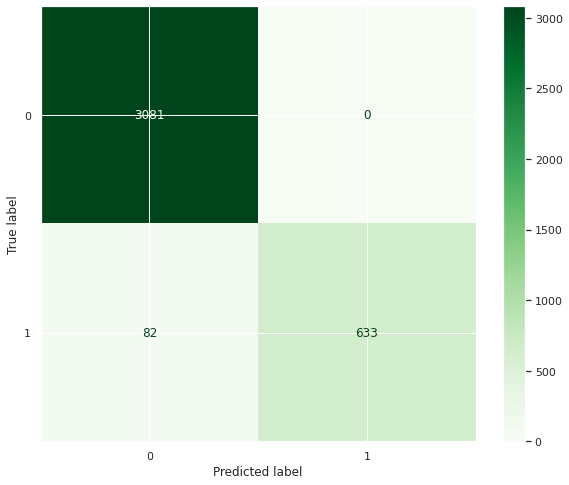

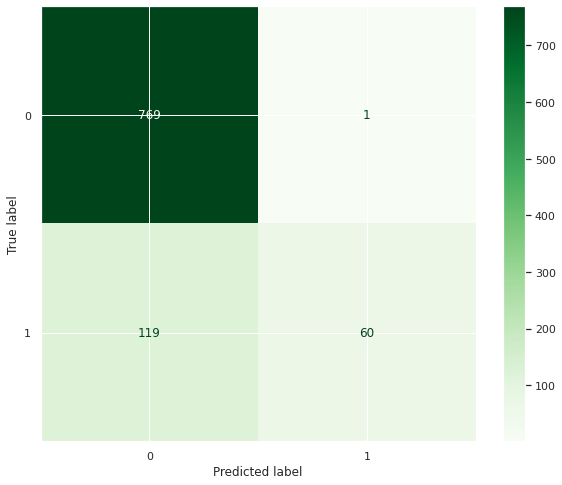

In [ ]:
disp = plot_confusion_matrix(svm_model, X_train, y_train, cmap = 'Greens')
disp = plot_confusion_matrix(svm_model, X_test, y_test, cmap = 'Greens')

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_ypred)
svm_accuracy

0.8735511064278187

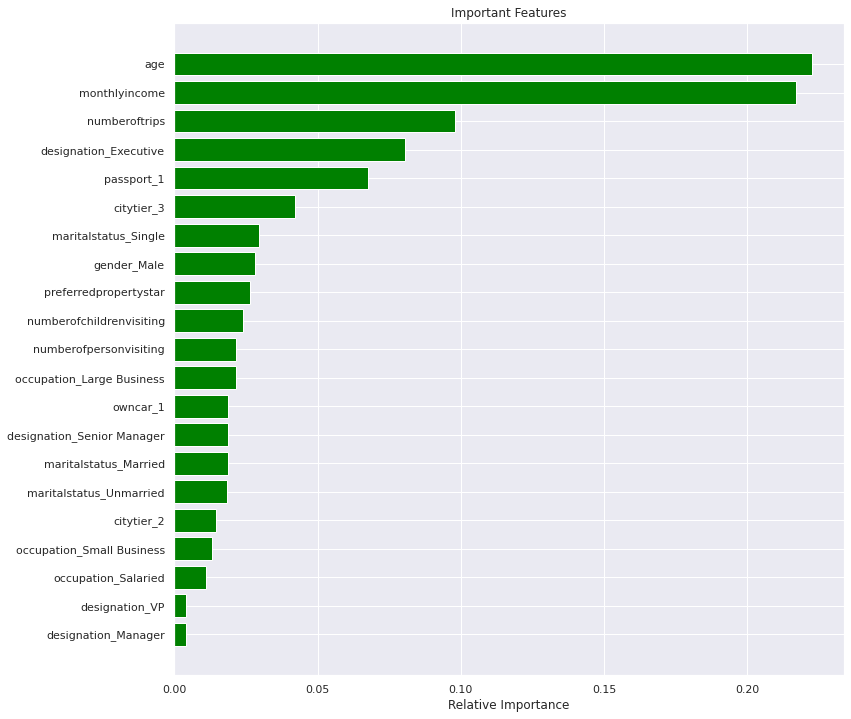

In [ ]:
important_features = dtree_model.feature_importances_
indices = np.argsort(important_features)

plt.figure(figsize=(12,12))
plt.title('Important Features')
plt.barh(range(len(indices)), important_features[indices], color='Green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

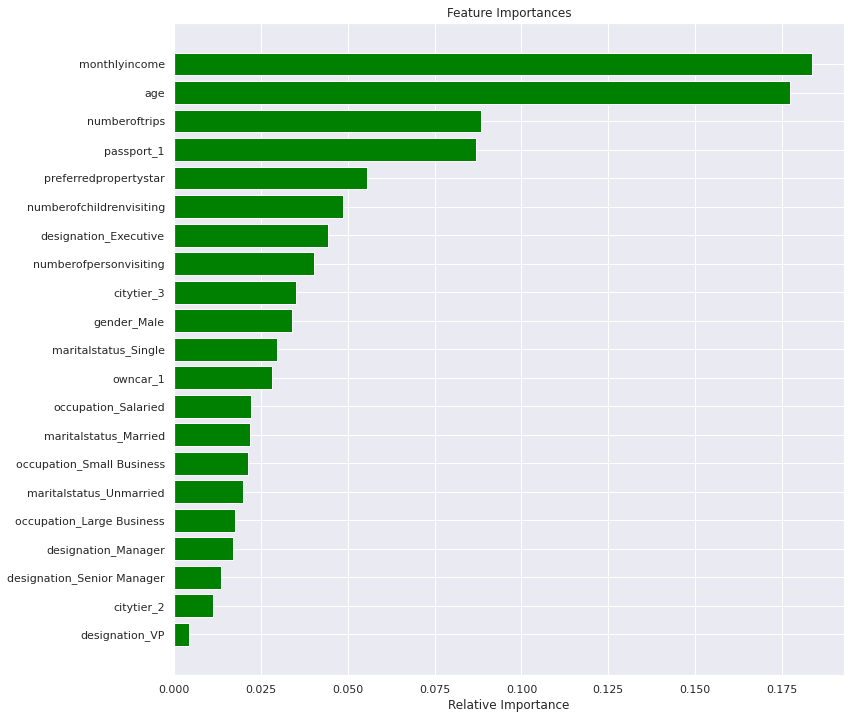

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Conclusion**

The random forest model has the best accuracy as it gives the best score.
The most important features are monthly income, age, people with passport, prefferedstar, citytier and designation.

Customers with the designation of `Executive` should be the company's `target` customers.
 
Customers who have a `passport`, live in a `tier 3 city`, are `single` or `unmarried`, and have a `large business` have a greater chance of obtaining a new package.

People who have taken an average of `4 trips` and come with children may be interested in purchasing the package.